# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

Artificial Dataset #1

In [4]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


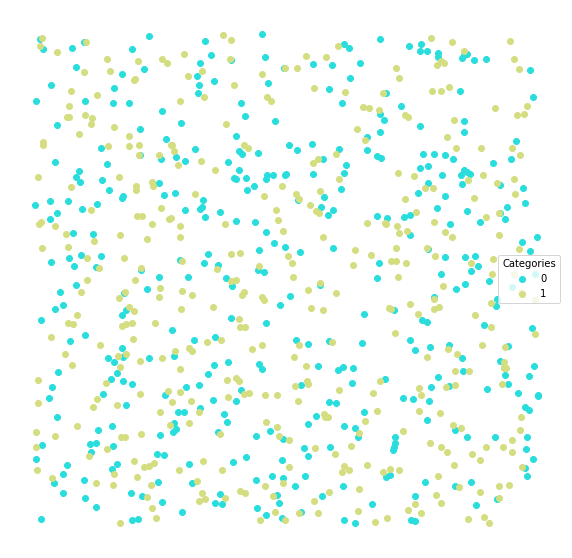

In [5]:
lucem_illud_2020.plotter(dfTrain)

In [6]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [7]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's 
#performance by using the testing set

Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.5  0.50015   0.515152           0.515075  0.495146
1                0.5  0.50015   0.485149           0.485075  0.505155

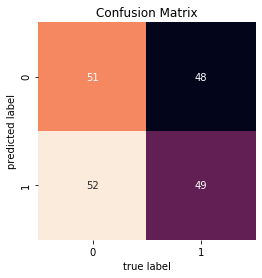

In [9]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

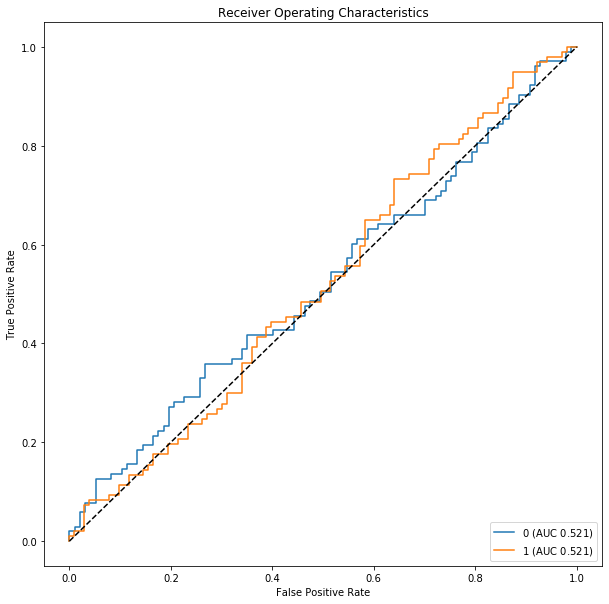

In [10]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


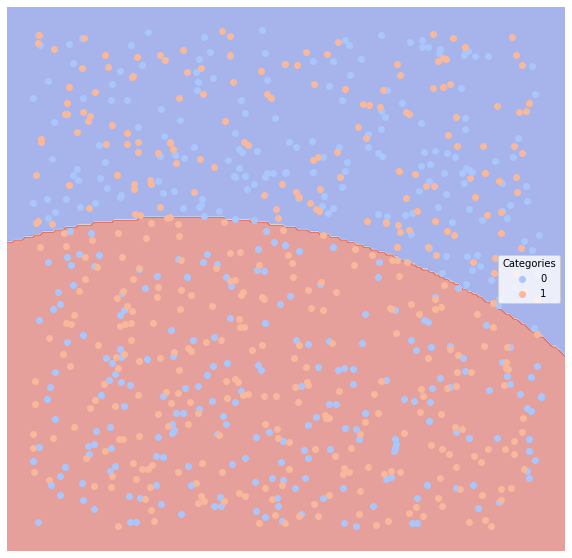

In [11]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [12]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [13]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0                0.5  0.498949   0.514019           0.514476  0.533981
1                0.5  0.498949   0.483871           0.484476  0.463918

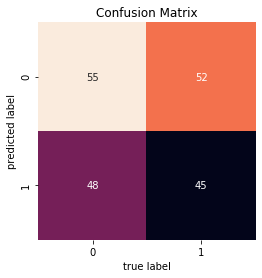

In [15]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

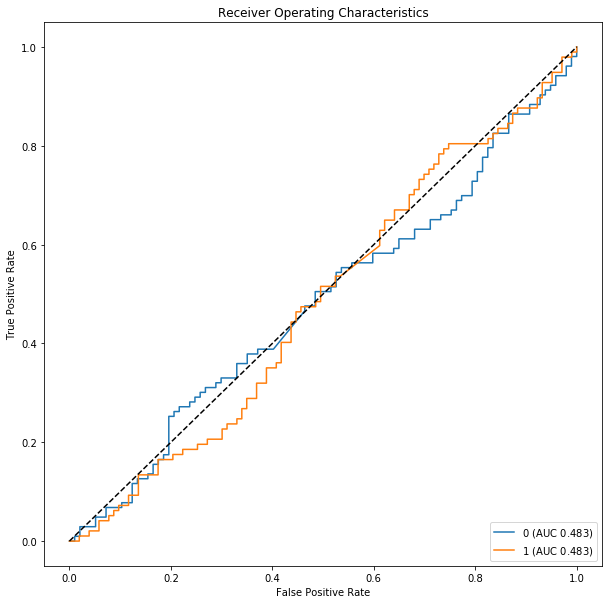

In [16]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


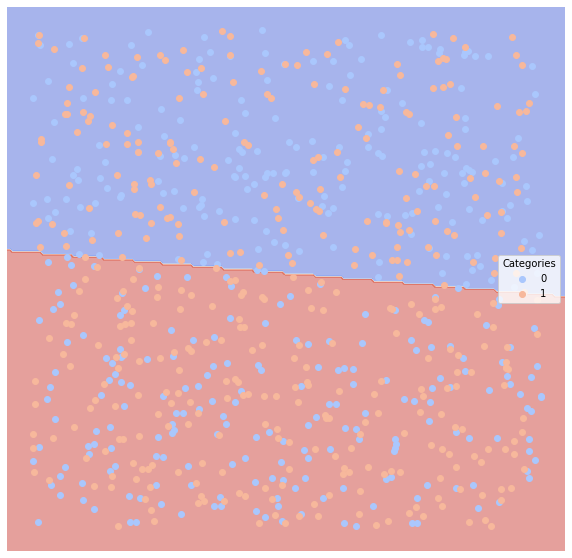

In [17]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [18]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [19]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.495  0.504104   0.518868           0.517065  0.533981
1              0.495  0.504104   0.489362           0.487068  0.474227

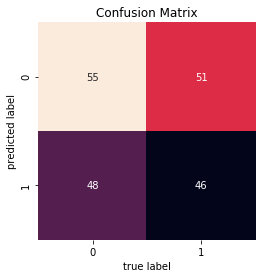

In [21]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

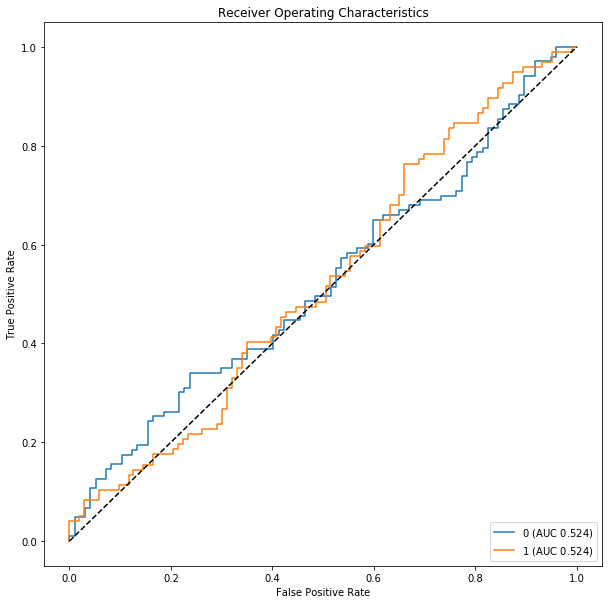

In [22]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


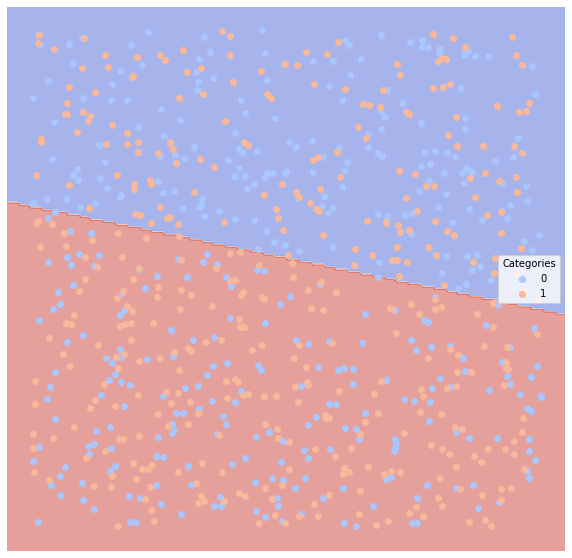

In [23]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [35]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [36]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.515  0.482584   0.500000           0.506553  0.563107
1              0.515  0.482584   0.464286           0.476672  0.402062

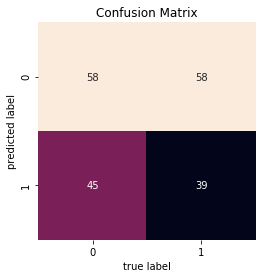

In [38]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

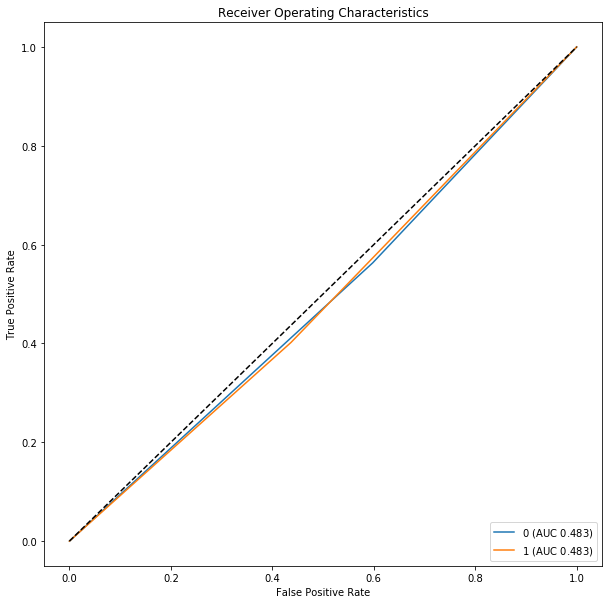

In [39]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


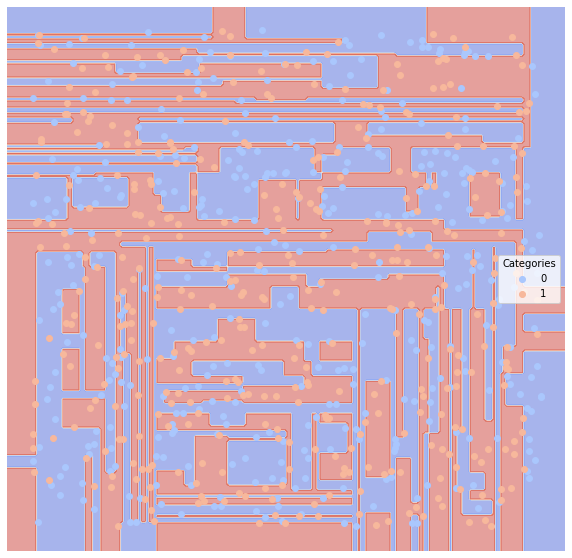

In [40]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [41]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [42]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [43]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.495  0.505305   0.520408           0.517678  0.495146
1              0.495  0.505305   0.490196           0.487678  0.515464

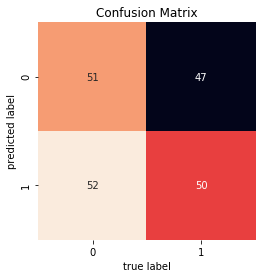

In [44]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

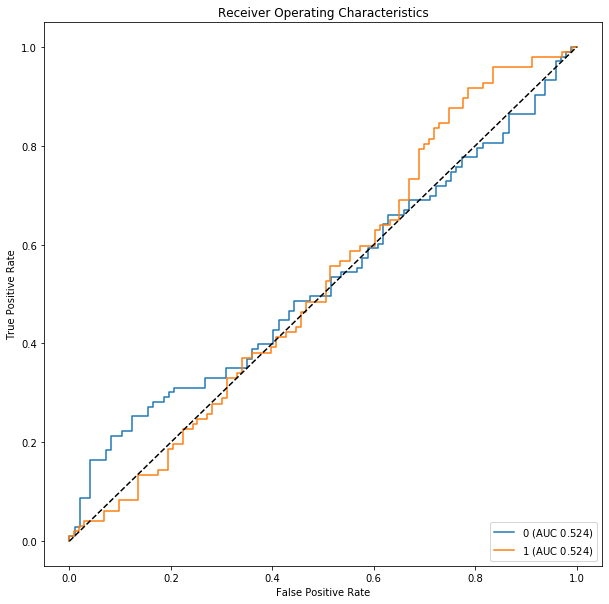

In [45]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


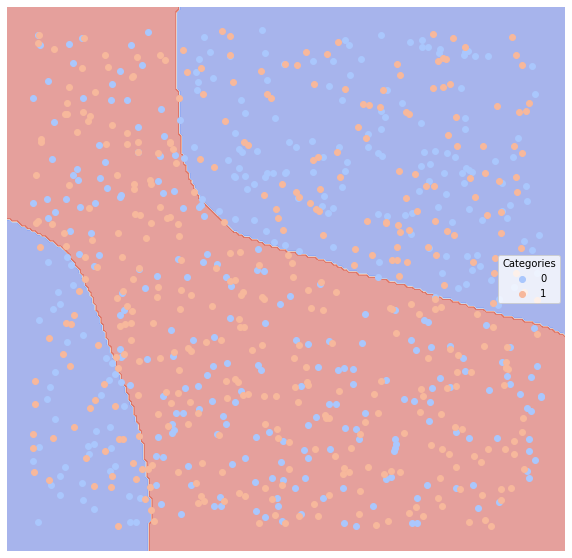

In [46]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [47]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [48]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [49]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.55  0.450405   0.463918           0.492682  0.436893
1               0.55  0.450405   0.436893           0.462682  0.463918

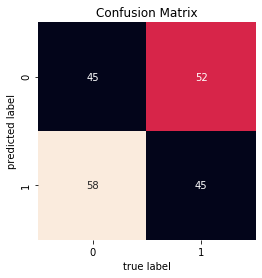

In [50]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

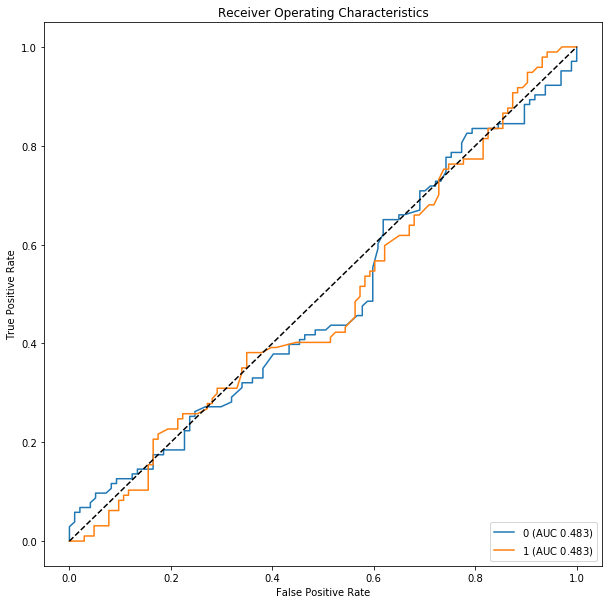

In [51]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


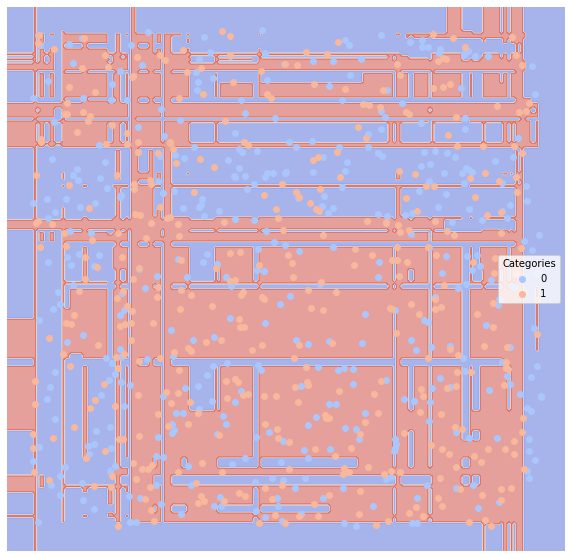

In [52]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Artificial Dataset #1: Analysis
The Bayes classifier worked best, as shown by the homogeneity of the confusion matrix and the two clear regions of the plot.

Artificial Dataset #2

In [53]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


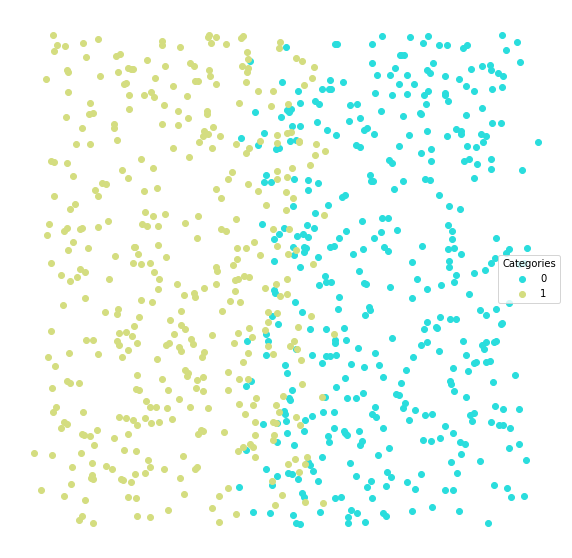

In [54]:
lucem_illud_2020.plotter(dfTrain)

In [55]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [56]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.910256   0.897959           0.863129  0.916667
1               0.09  0.910256   0.921569           0.882956  0.903846

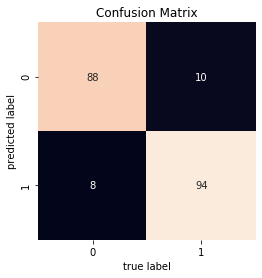

In [58]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

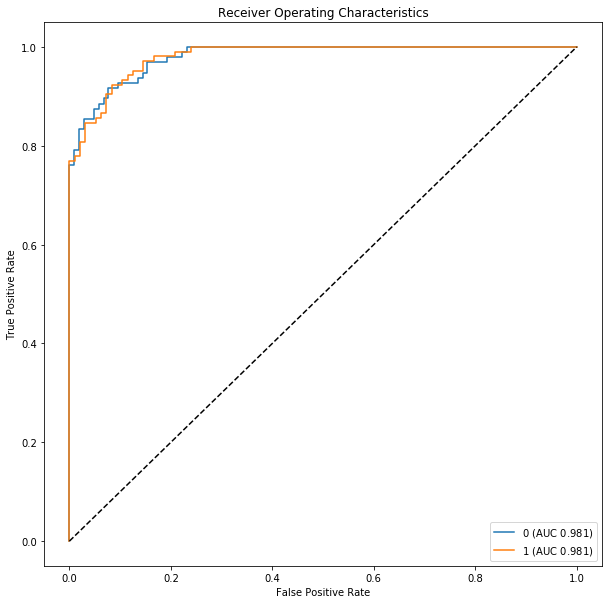

In [59]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


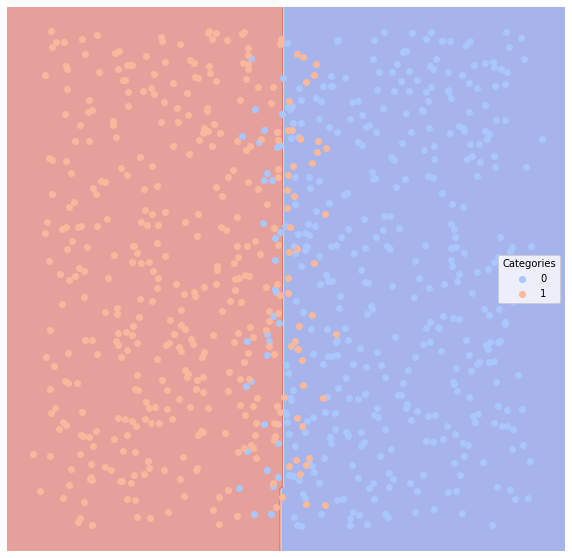

In [60]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [61]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [62]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.920272   0.908163           0.876943  0.927083
1               0.08  0.920272   0.931373           0.895773  0.913462

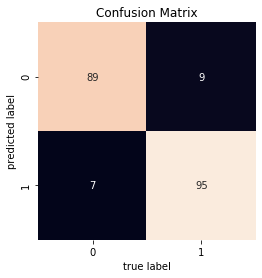

In [64]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

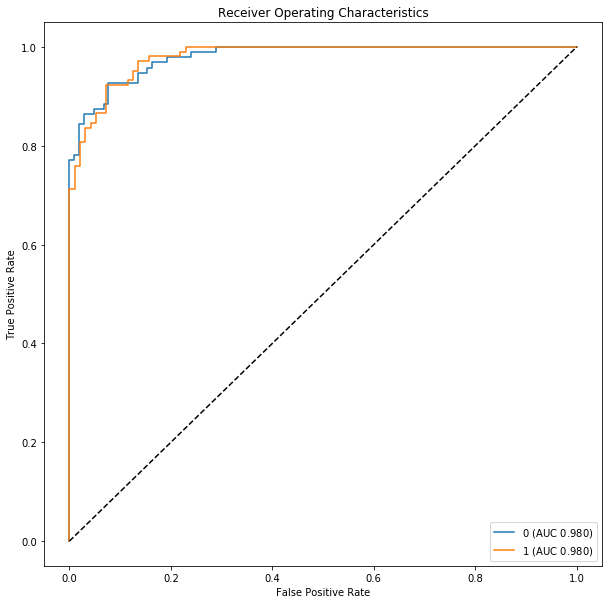

In [65]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


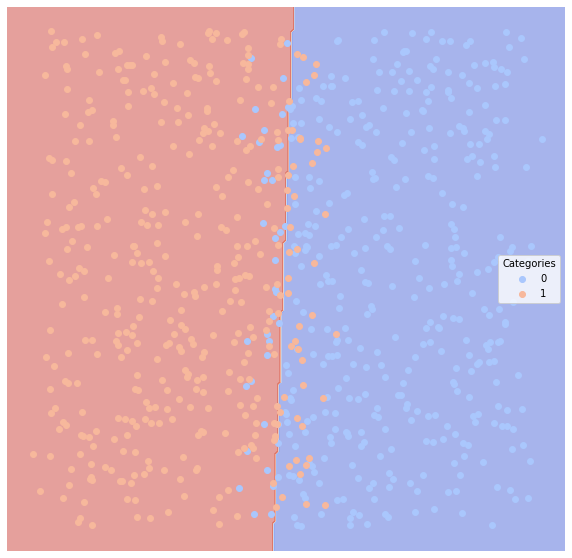

In [66]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [67]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [68]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.920272   0.908163           0.876943  0.927083
1               0.08  0.920272   0.931373           0.895773  0.913462

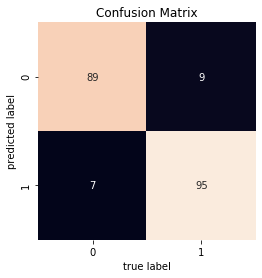

In [70]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

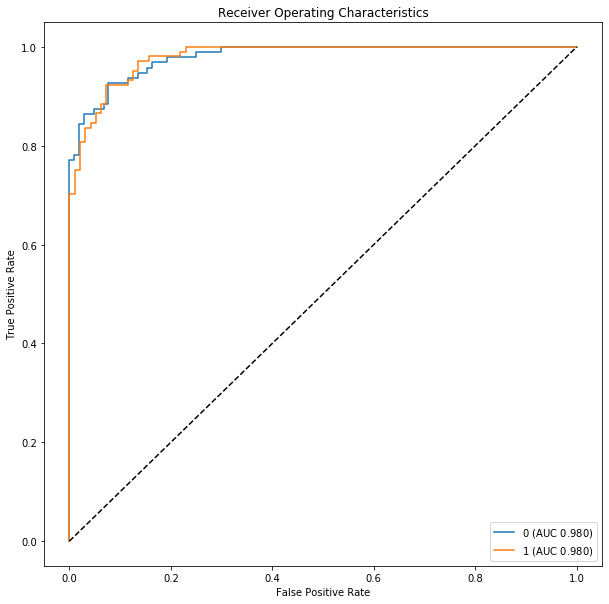

In [71]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


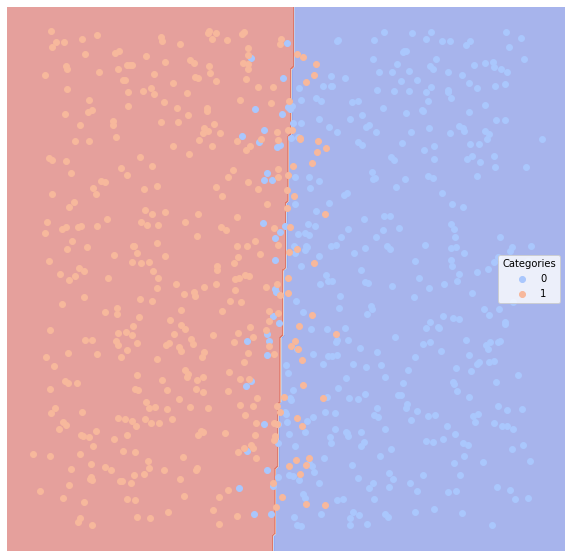

In [72]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [73]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [74]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.135  0.865785   0.841584           0.800153  0.885417
1              0.135  0.865785   0.888889           0.832137  0.846154

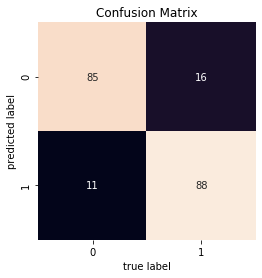

In [76]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

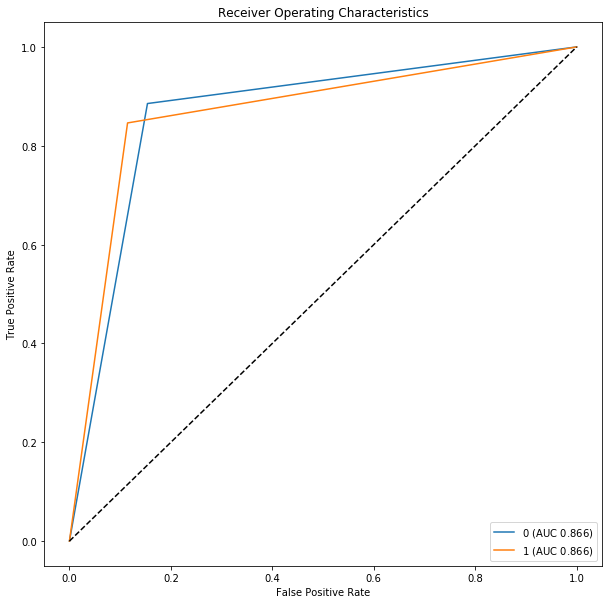

In [77]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


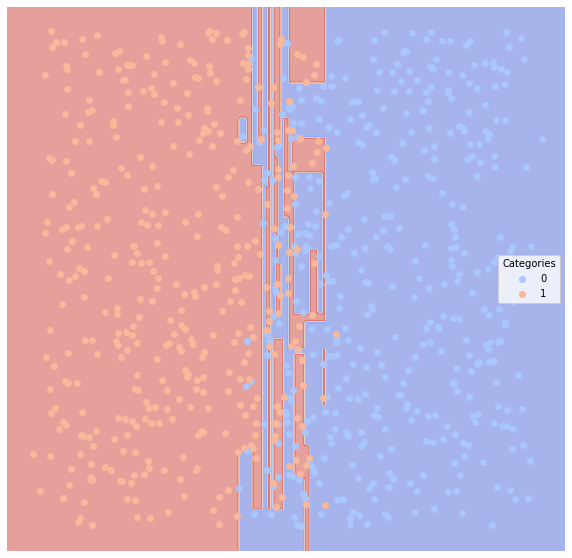

In [78]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [79]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [80]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [81]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.075  0.92508   0.917526           0.885623  0.927083
1              0.075  0.92508   0.932039           0.900344  0.923077

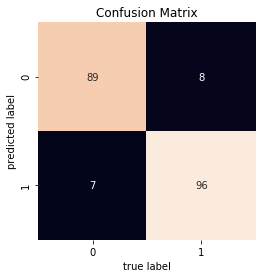

In [82]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

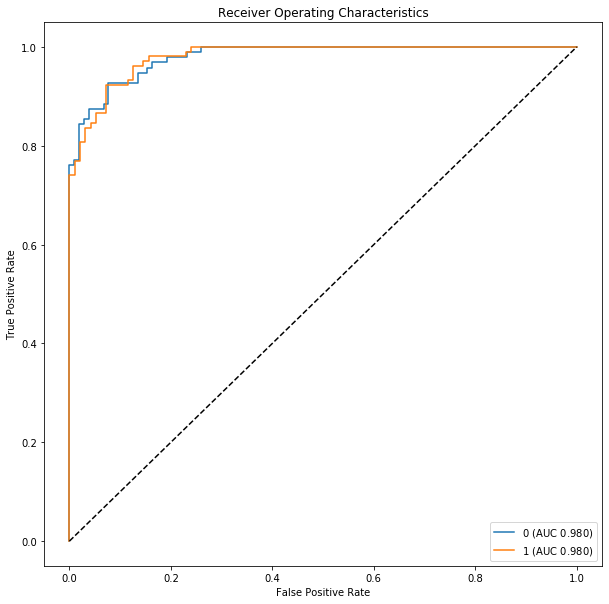

In [83]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


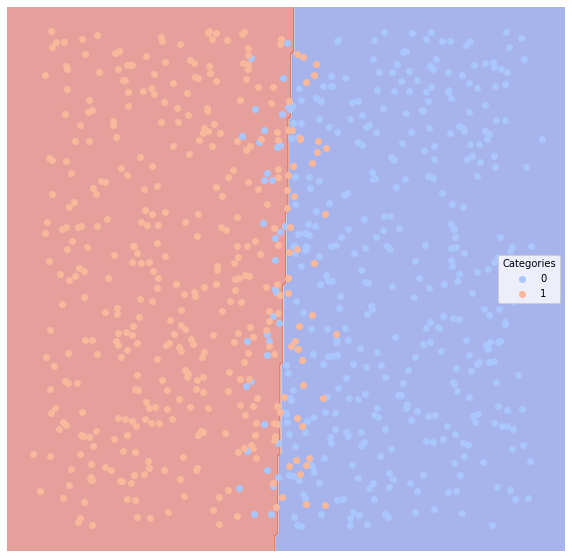

In [84]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [85]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [86]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [87]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.085  0.915465   0.898990           0.868439  0.927083
1              0.085  0.915465   0.930693           0.891203  0.903846

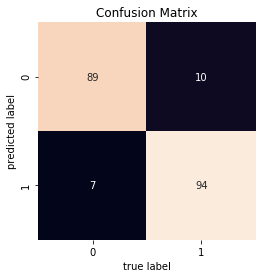

In [88]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

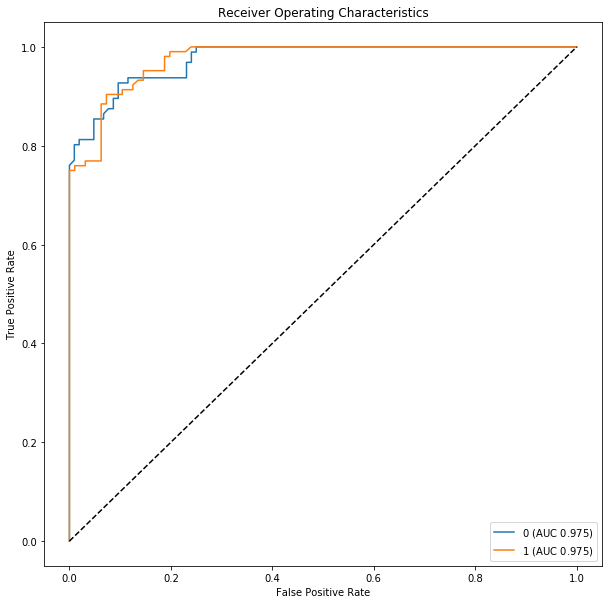

In [89]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


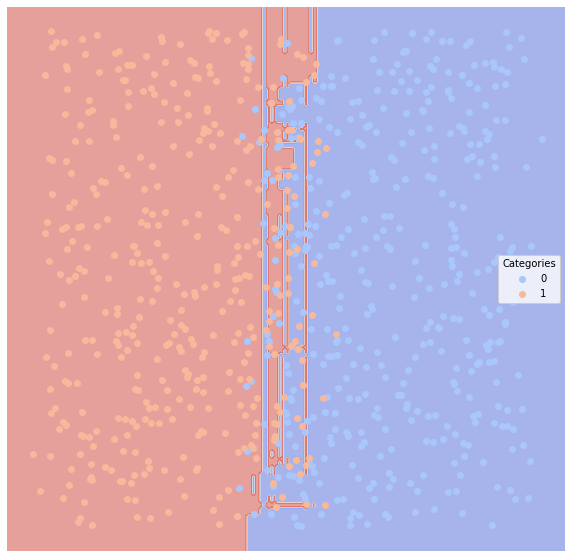

In [90]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Artificial Dataset #2: Analysis
Bayes, Analogizes, and Classical Regression seem most fitted to this dataset; as shown by the homogeneity of the confusion matrices, the clarity of the regions in the regions plots, and the large area under both lines in the line plots.

Artificial Dataset #3

In [91]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


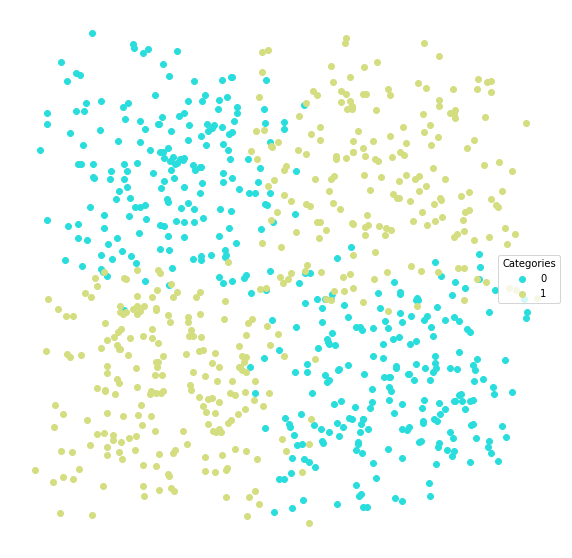

In [92]:
lucem_illud_2020.plotter(dfTrain)

In [93]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [94]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.535  0.465269   0.450980           0.468867  0.474227
1              0.535  0.465269   0.479592           0.498843  0.456311

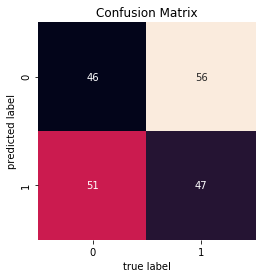

In [96]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

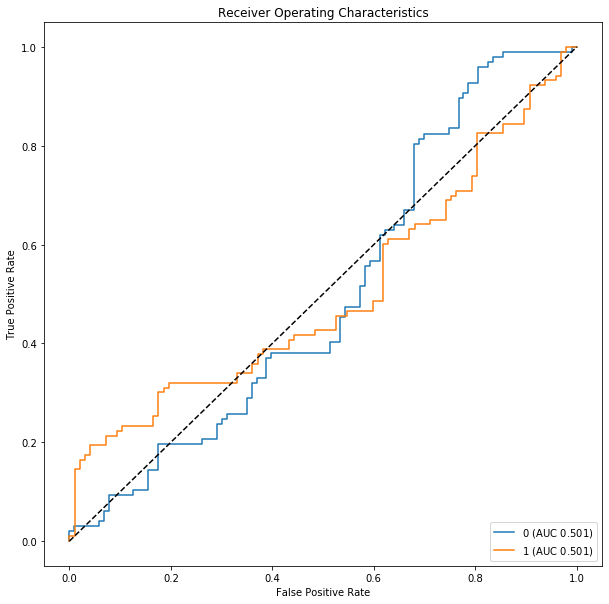

In [97]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


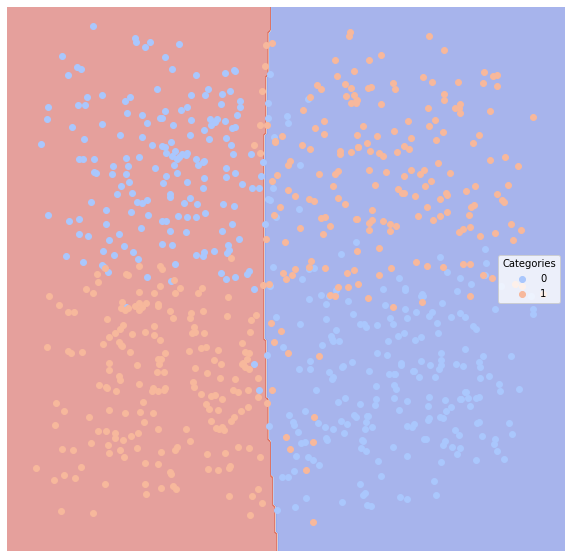

In [98]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [99]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [100]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [101]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.545  0.454659   0.438776           0.464509  0.443299
1              0.545  0.454659   0.470588           0.494303  0.466019

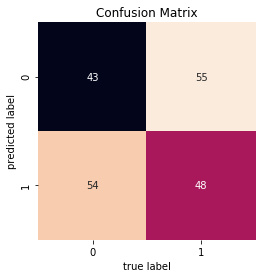

In [102]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

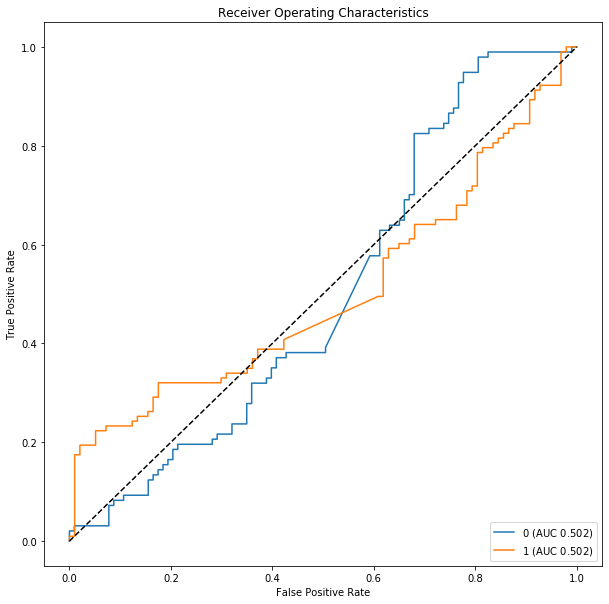

In [103]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


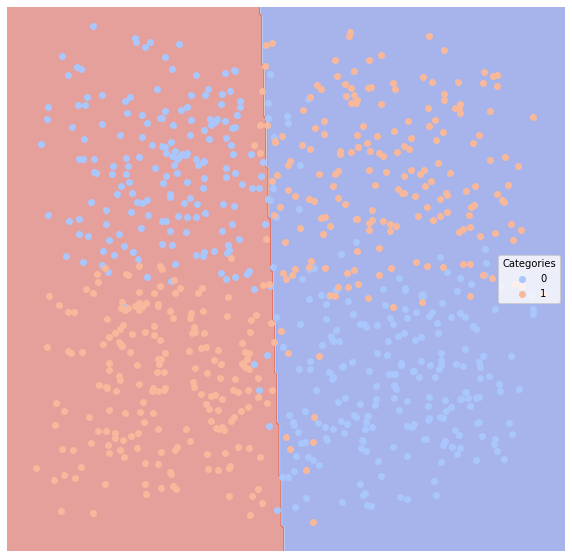

In [104]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [105]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [106]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.54  0.460114   0.445545           0.466696  0.463918
1               0.54  0.460114   0.474747           0.496632  0.456311

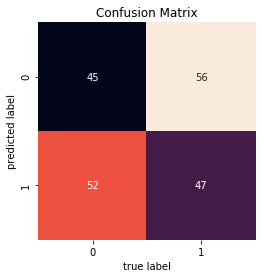

In [108]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

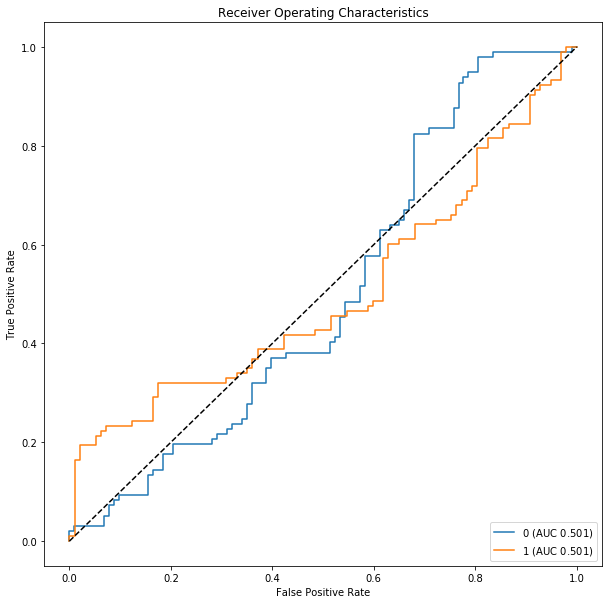

In [109]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


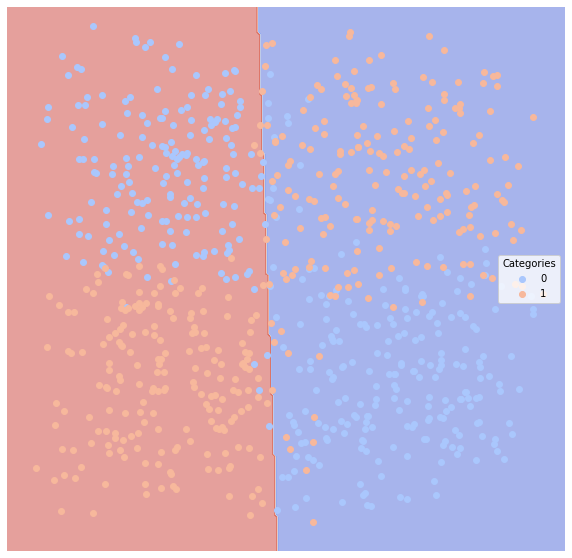

In [110]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [111]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [112]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [113]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.12  0.879291   0.892473           0.833663  0.855670
1               0.12  0.879291   0.869159           0.834775  0.902913

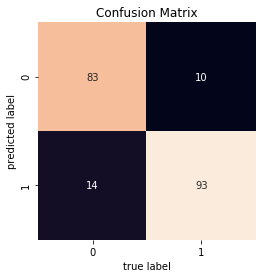

In [114]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

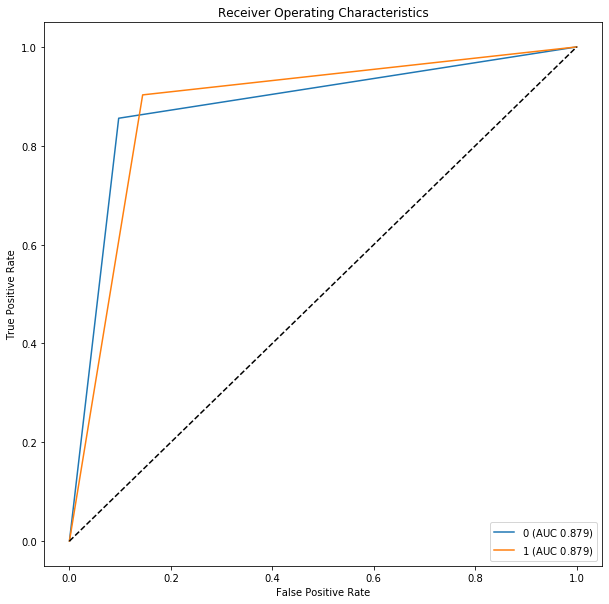

In [115]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


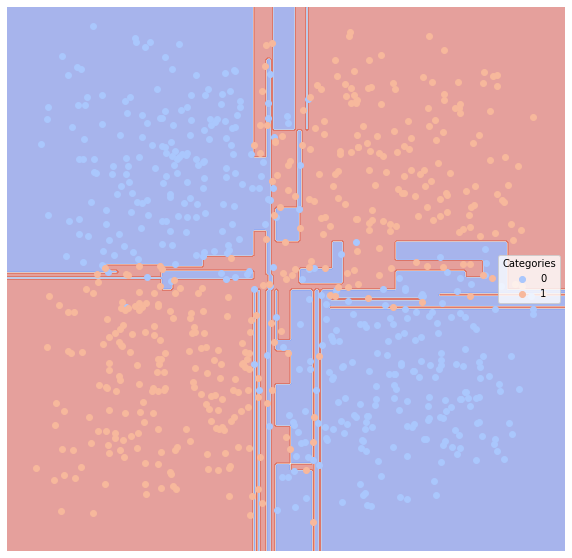

In [116]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [117]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [118]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [119]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.893854   0.922222           0.859118  0.855670
1              0.105  0.893854   0.872727           0.848416  0.932039

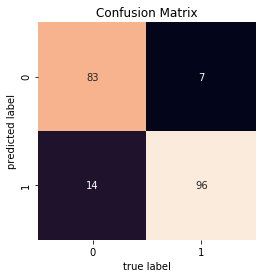

In [120]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

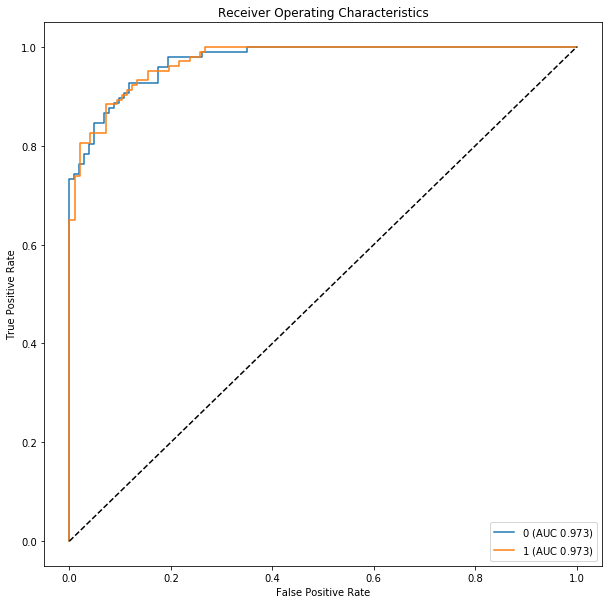

In [121]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


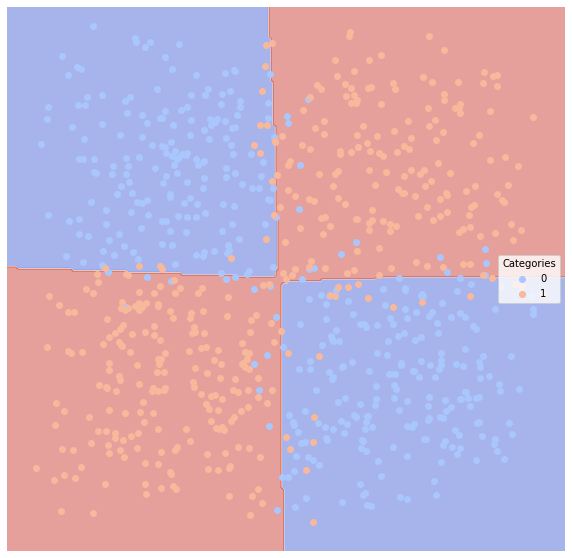

In [122]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [123]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [124]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [125]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.883845   0.911111           0.845218  0.845361
1              0.115  0.883845   0.863636           0.836558  0.922330

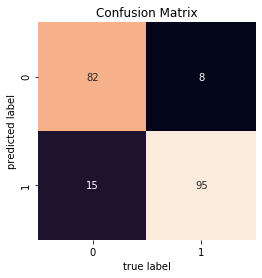

In [126]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

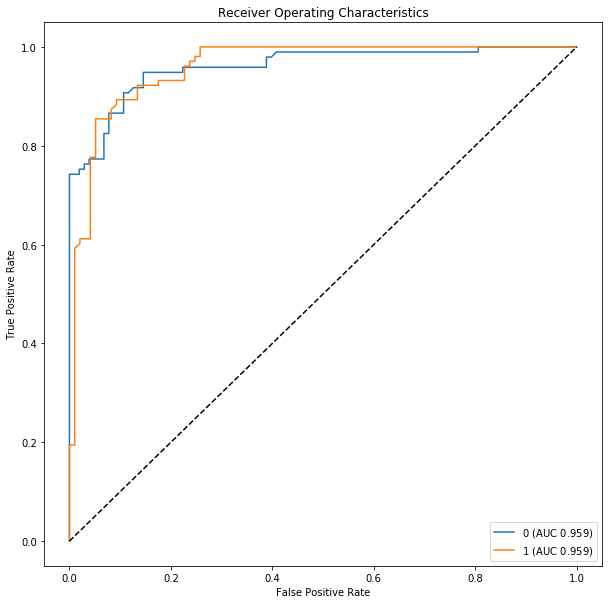

In [127]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


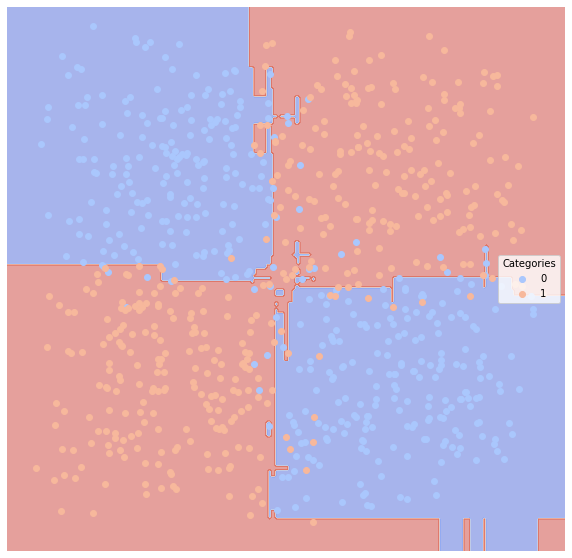

In [128]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Articial Dataset #3: Analysis
The Connectionists yeiled the only results which produced both colinear line plots and clear regions in the regions plots, making it the best method.

Artificial Dataset #4

In [129]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


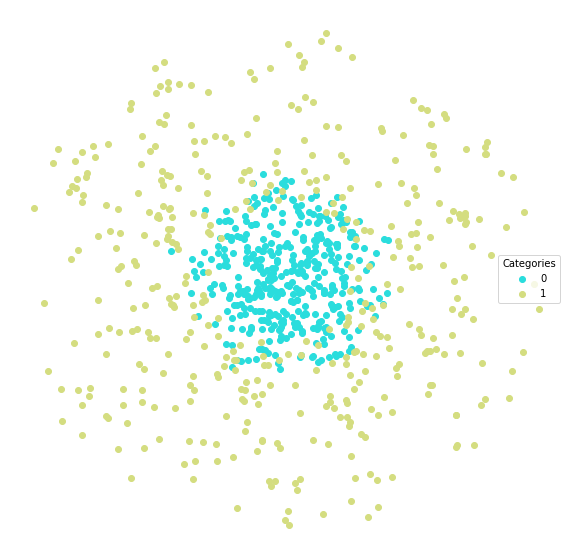

In [130]:
lucem_illud_2020.plotter(dfTrain)

In [131]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [132]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [133]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.135  0.860563   0.862069           0.831639  0.900901
1              0.135  0.860563   0.869048           0.792814  0.820225

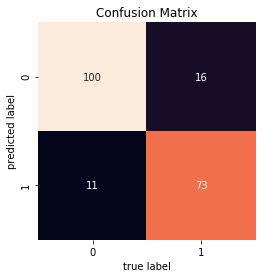

In [134]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

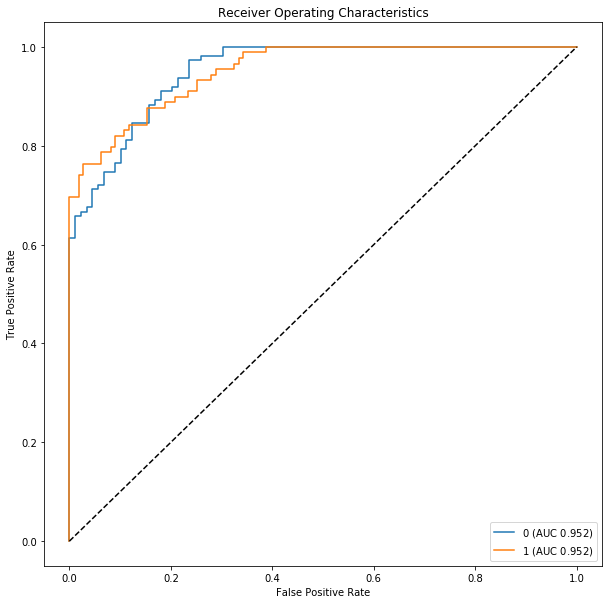

In [135]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


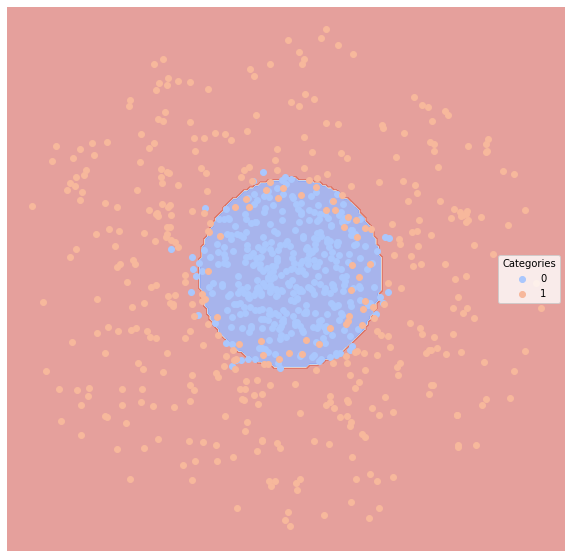

In [136]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [137]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [138]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [139]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0              0.555  0.5      0.000              0.555     0.0
1              0.555  0.5      0.445              0.445     1.0

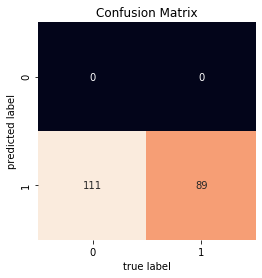

In [140]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

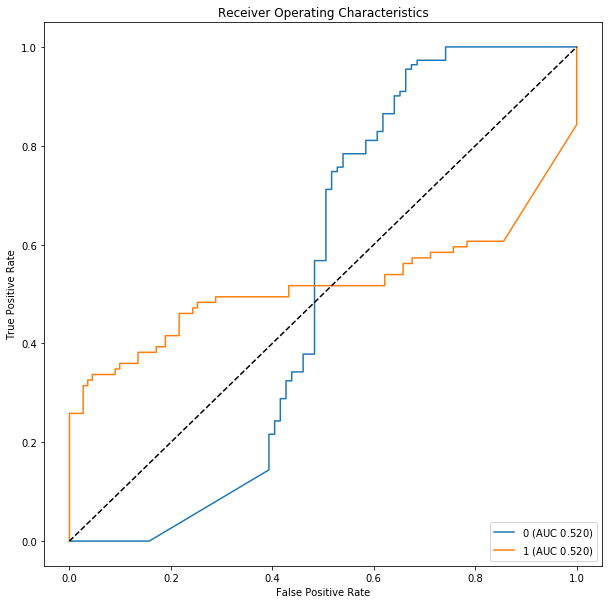

In [141]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


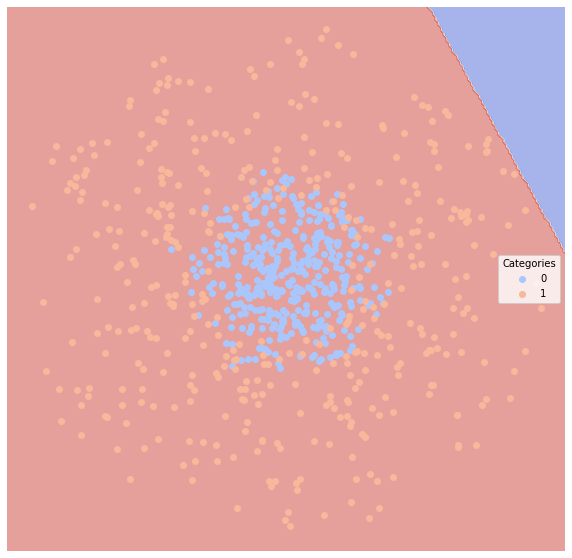

In [142]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [143]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [144]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.625  0.393511   0.390625           0.517979  0.225225
1              0.625  0.393511   0.367647           0.401543  0.561798

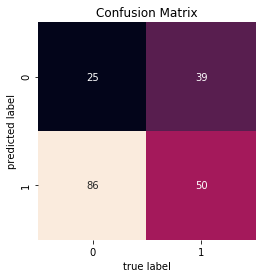

In [146]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

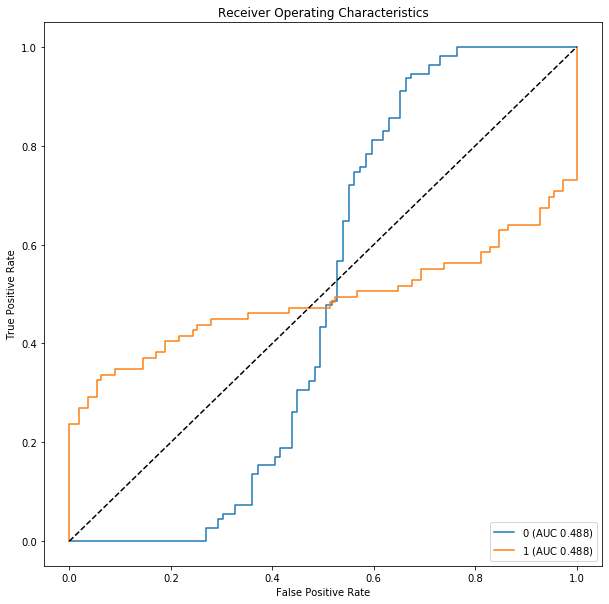

In [147]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


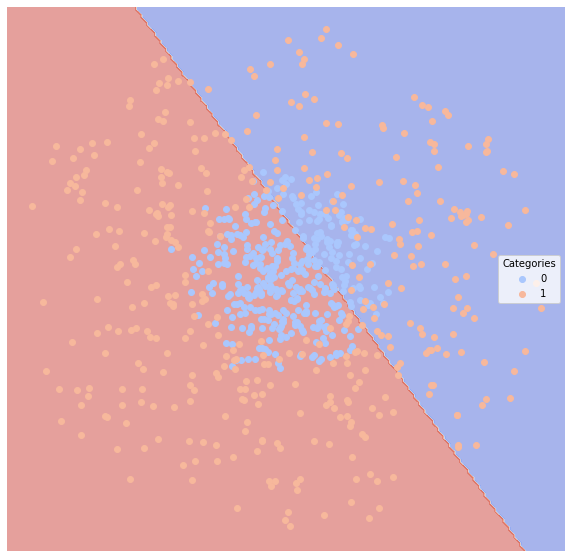

In [148]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [149]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [150]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.14  0.859399   0.880734           0.836716  0.864865
1               0.14  0.859399   0.835165           0.778174  0.853933

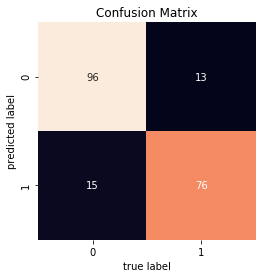

In [152]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

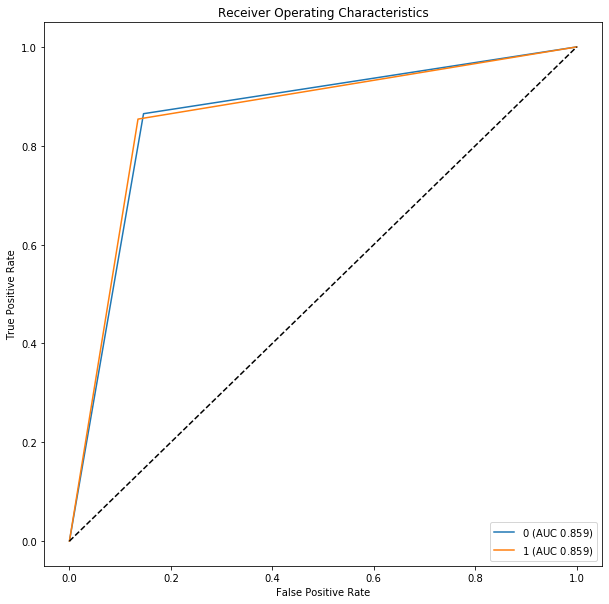

In [153]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


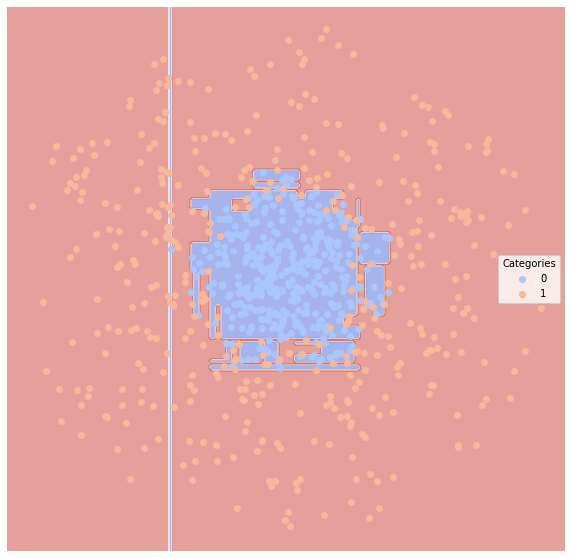

In [154]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [155]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [156]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [157]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.863954   0.857143           0.832645  0.918919
1               0.13  0.863954   0.888889           0.804101  0.808989

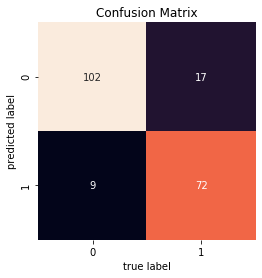

In [158]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

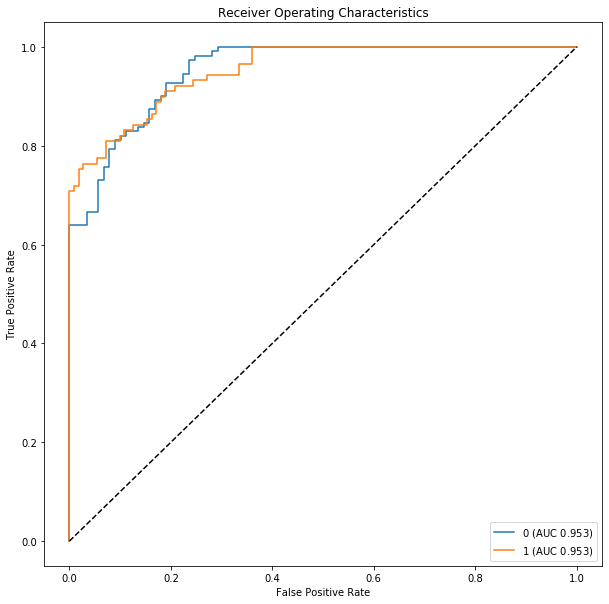

In [159]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


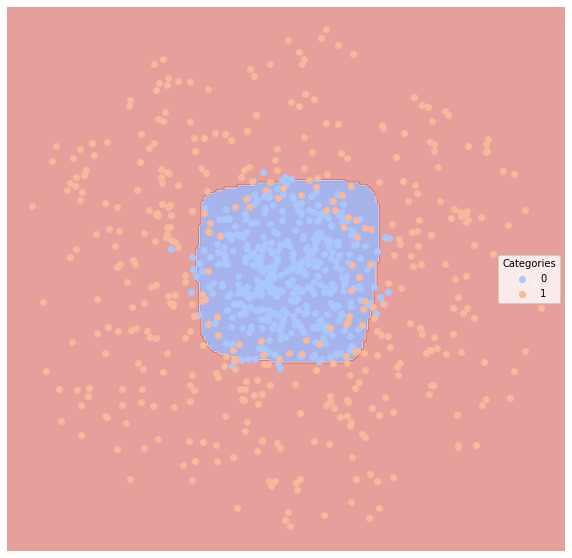

In [160]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [161]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [162]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.145  0.853781   0.872727           0.829791  0.864865
1              0.145  0.853781   0.833333           0.772247  0.842697

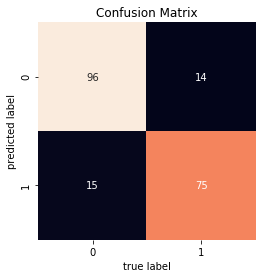

In [164]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

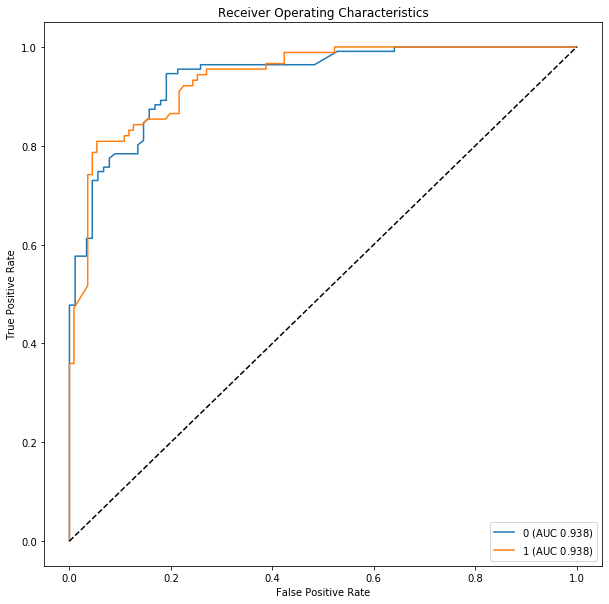

In [165]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


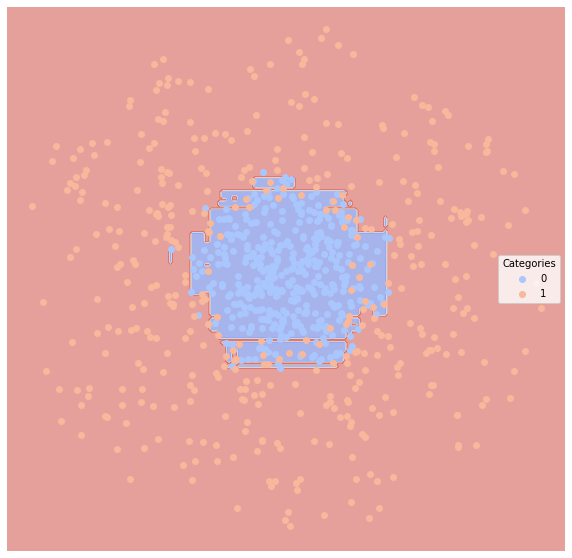

In [166]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Artificial Dataset #4: Analysis
While the Ensemble and Connectionist methods came close, the Bayes method was the only one that produced a clear region in the region plot. 

Artificial Dataset #5

In [171]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

AttributeError: module 'sklearn' has no attribute 'datasets'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


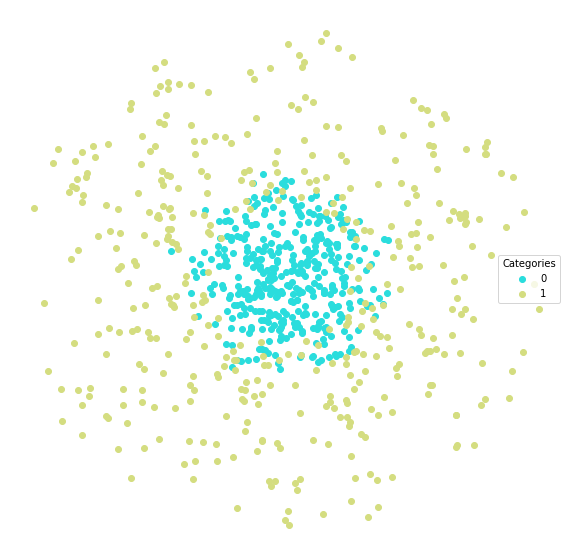

In [172]:
lucem_illud_2020.plotter(dfTrain)

In [173]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [174]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [175]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.135  0.860563   0.862069           0.831639  0.900901
1              0.135  0.860563   0.869048           0.792814  0.820225

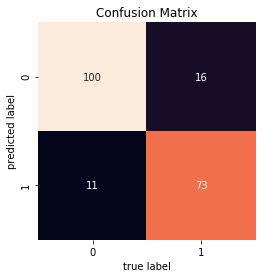

In [176]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

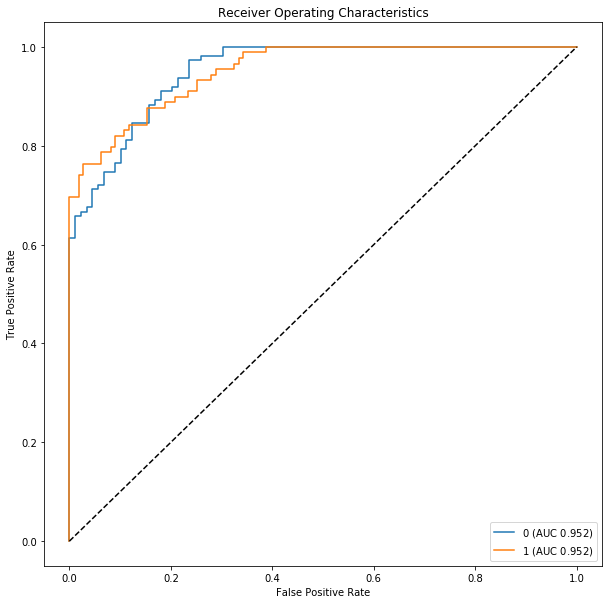

In [177]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


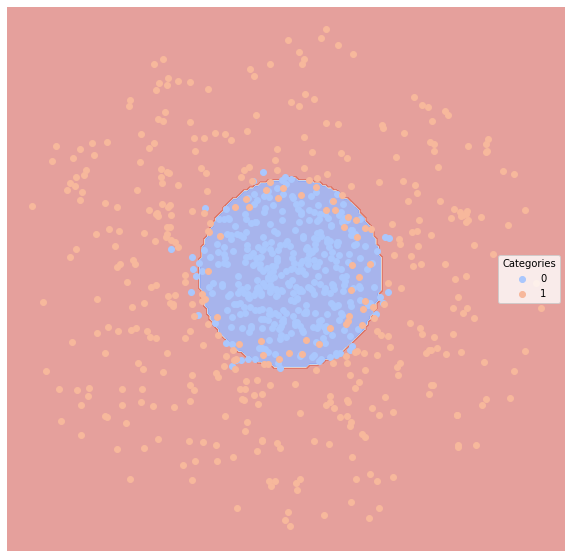

In [178]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [179]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [180]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [181]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0              0.555  0.5      0.000              0.555     0.0
1              0.555  0.5      0.445              0.445     1.0

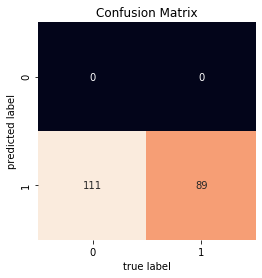

In [182]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

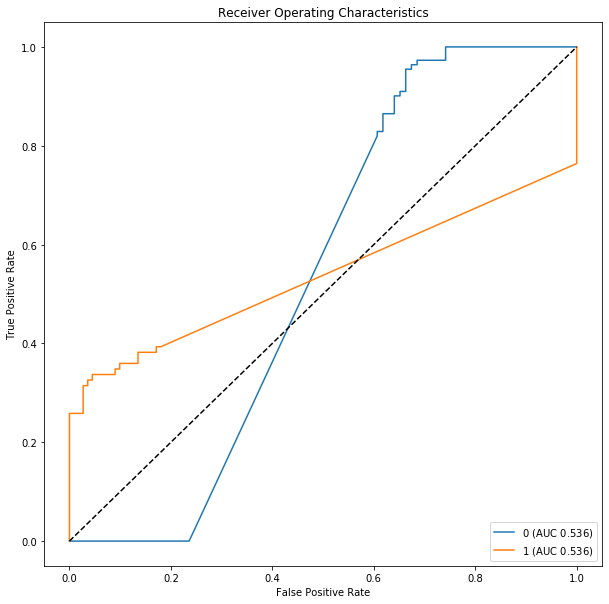

In [183]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


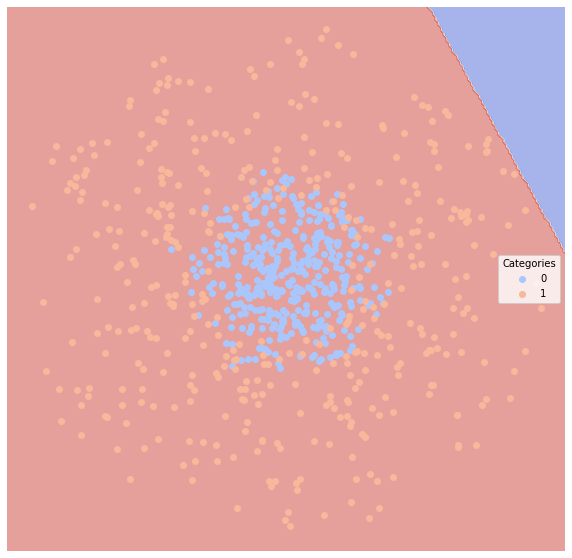

In [184]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [185]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [186]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.625  0.393511   0.390625           0.517979  0.225225
1              0.625  0.393511   0.367647           0.401543  0.561798

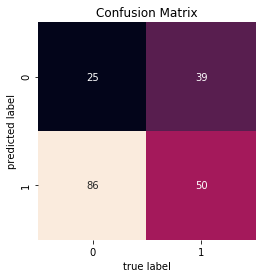

In [188]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

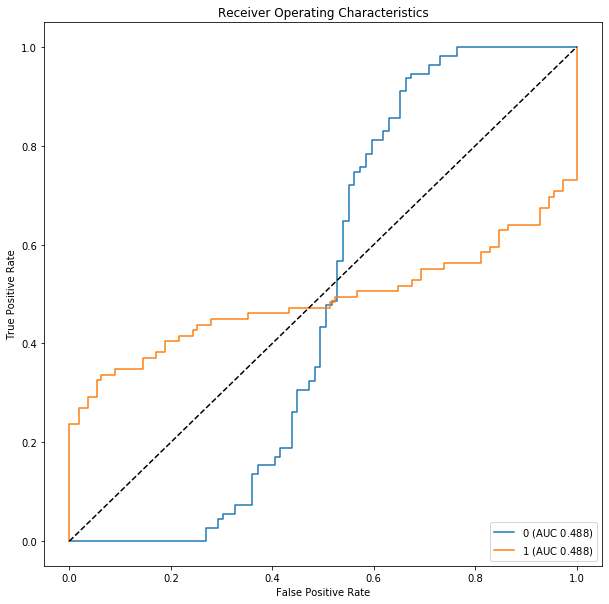

In [189]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


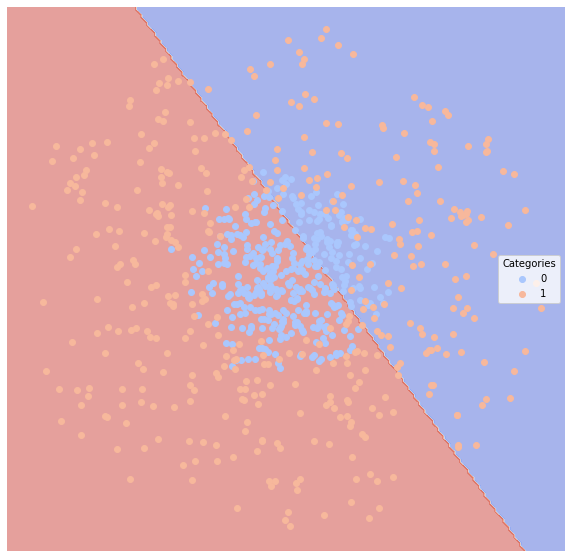

In [190]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [191]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [192]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [193]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.15  0.849276   0.871560           0.825929  0.855856
1               0.15  0.849276   0.824176           0.764530  0.842697

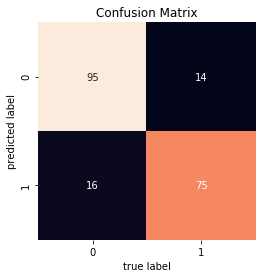

In [194]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

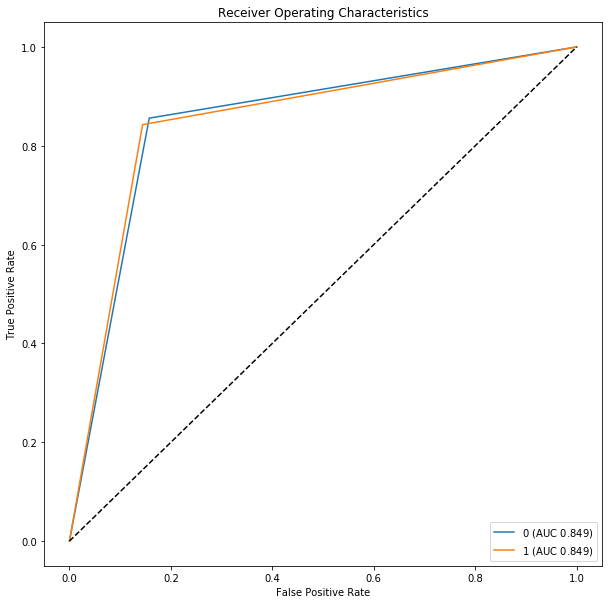

In [195]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


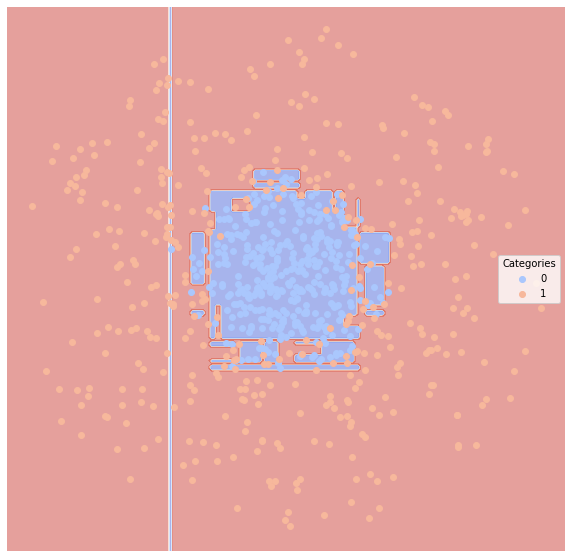

In [196]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [197]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [198]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [199]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.863954   0.857143           0.832645  0.918919
1               0.13  0.863954   0.888889           0.804101  0.808989

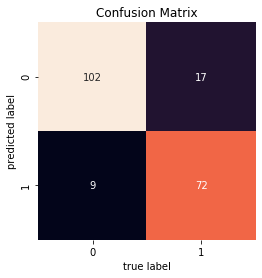

In [200]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

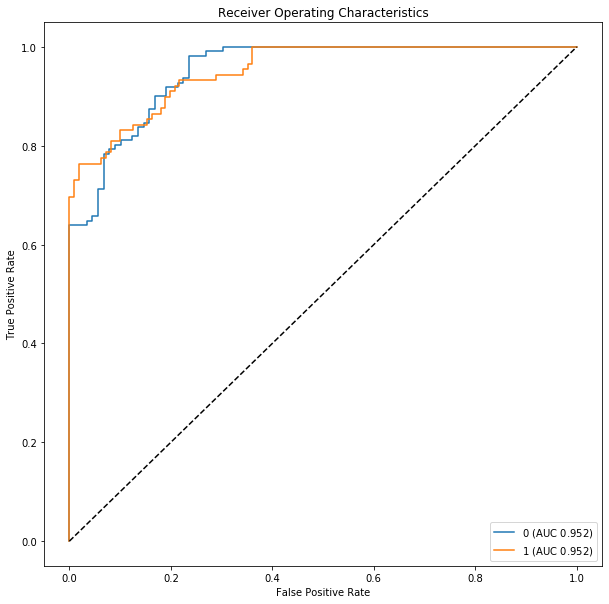

In [201]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


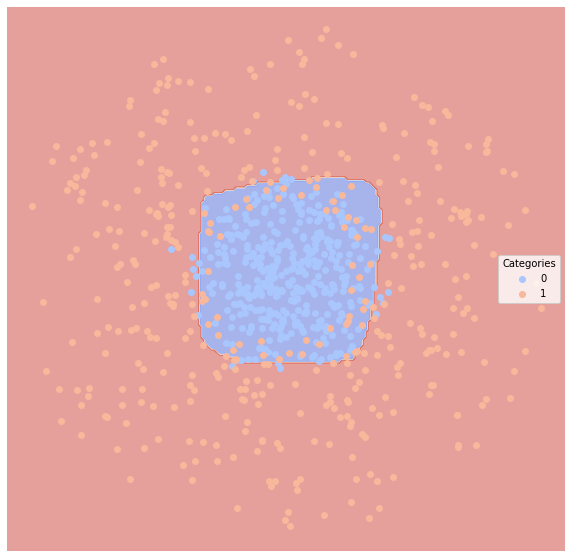

In [202]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [203]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [204]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [205]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.145  0.853781   0.872727           0.829791  0.864865
1              0.145  0.853781   0.833333           0.772247  0.842697

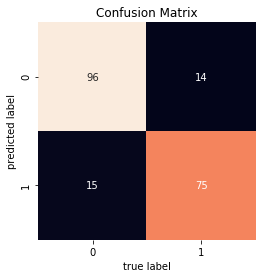

In [206]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

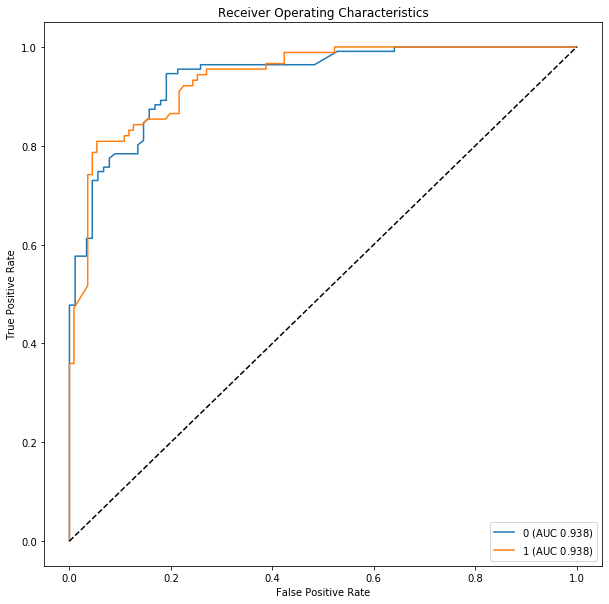

In [207]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


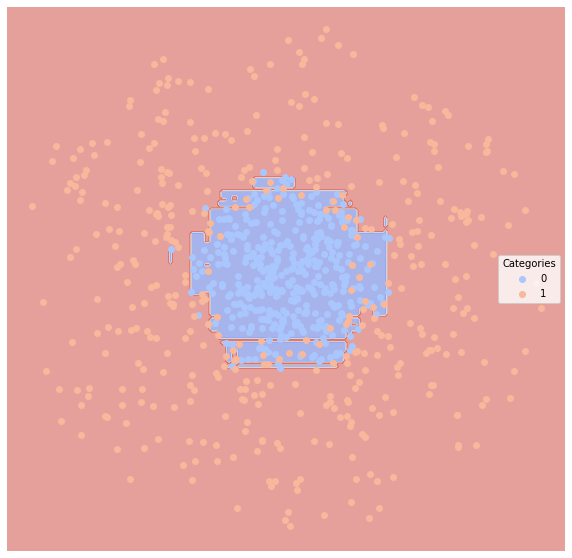

In [208]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Artificial Dataset #5: Analysis
[same observations as previous example]

Real Dataset #1

In [212]:
import sklearn.feature_extraction
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())

Loading Reddit data
Converting to vectors


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

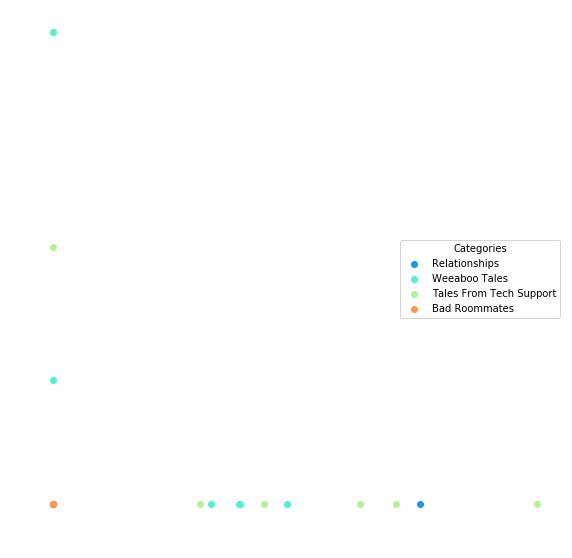

In [213]:
lucem_illud_2020.plotter(dfTrain)

In [214]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

In [215]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [216]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.197492  0.677690   0.653846           0.422468   
Weeaboo Tales              0.200627  0.840677   0.524590           0.498434   
Tales From Tech Support    0.090909  0.864356   0.864865           0.726445   
Bad Roommates              0.137931  0.797414   0.802817           0.620027   

                           Recall  
Category                           
Relationships            0.430380  
Weeaboo Tales            0.914286  
Tales From Tech Support  0.771084  
Bad Roommates            0.655172

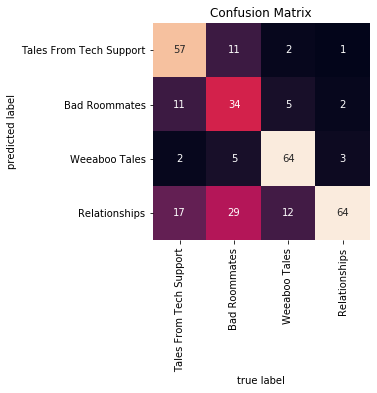

In [217]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

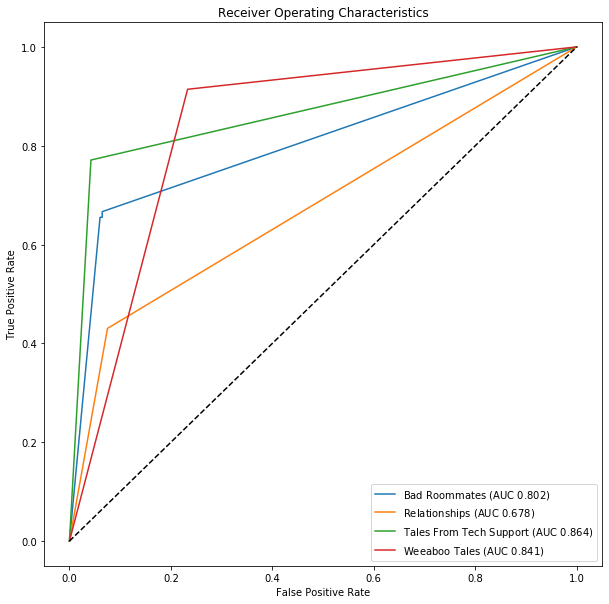

In [218]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

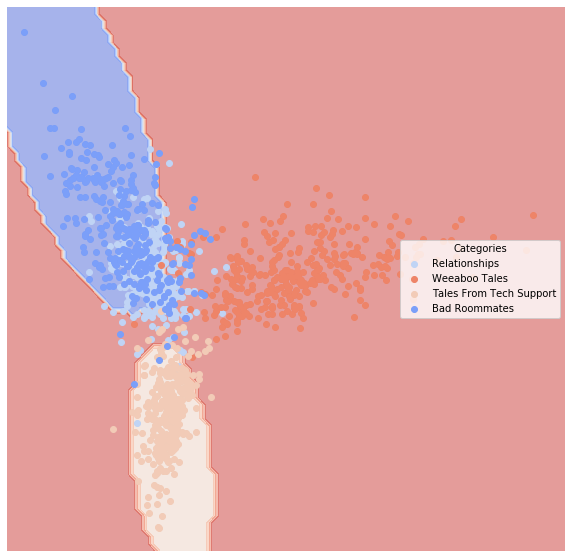

In [219]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [220]:
#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up

In [221]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [222]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.015674  0.989583   0.940476           0.940476   
Weeaboo Tales              0.009404  0.978571   1.000000           0.966547   
Tales From Tech Support    0.012539  0.983715   0.975904           0.958657   
Bad Roommates              0.012539  0.980603   0.988235           0.963563   

                           Recall  
Category                           
Relationships            1.000000  
Weeaboo Tales            0.957143  
Tales From Tech Support  0.975904  
Bad Roommates            0.965517

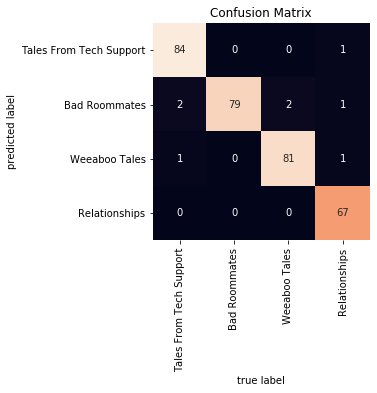

In [223]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

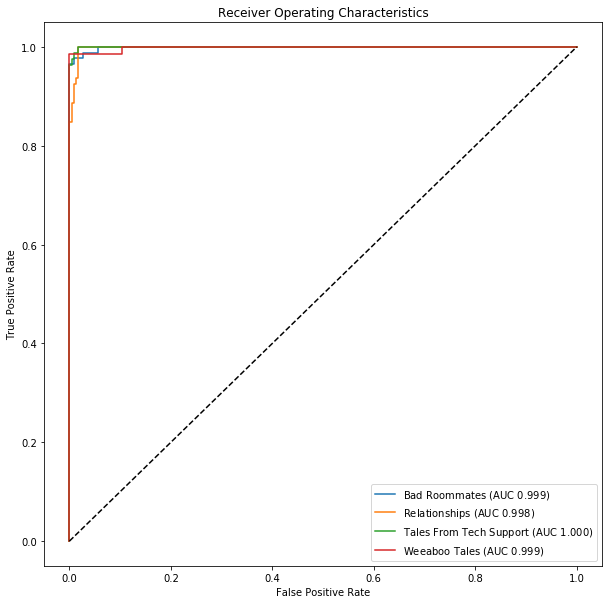

In [224]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

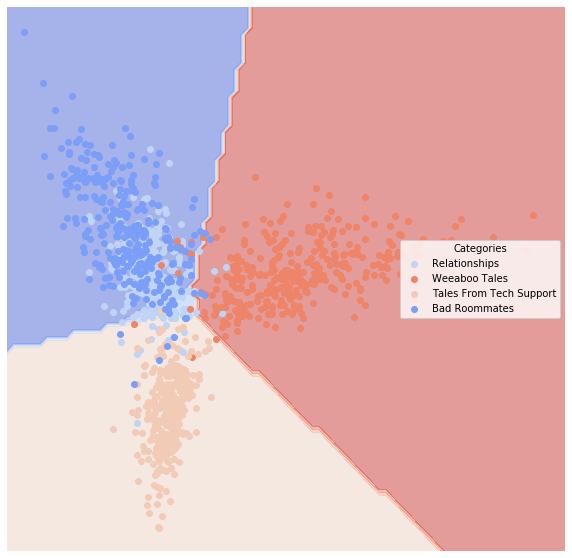

In [225]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [226]:
#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

In [227]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.021944  0.972679   0.950000           0.923328   
Weeaboo Tales              0.009404  0.983706   0.985507           0.963619   
Tales From Tech Support    0.015674  0.981596   0.964286           0.947320   
Bad Roommates              0.015674  0.978448   0.976744           0.952468   

                           Recall  
Category                           
Relationships            0.962025  
Weeaboo Tales            0.971429  
Tales From Tech Support  0.975904  
Bad Roommates            0.965517

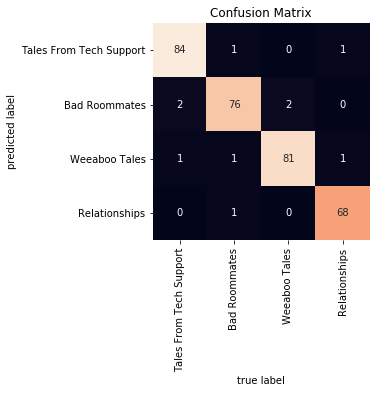

In [229]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

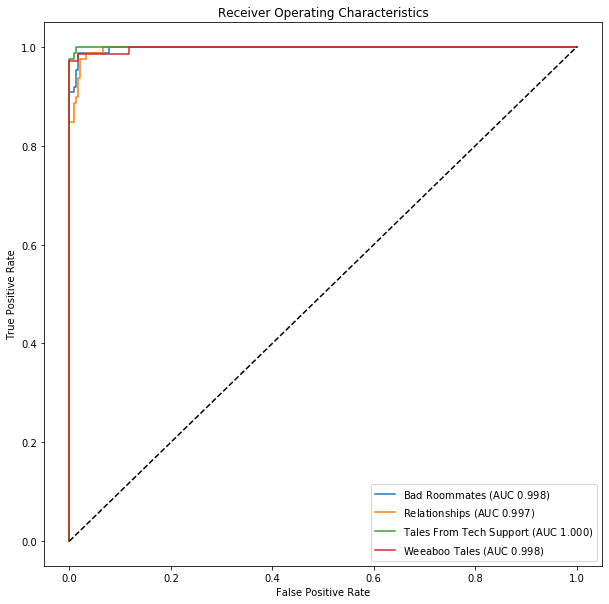

In [230]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

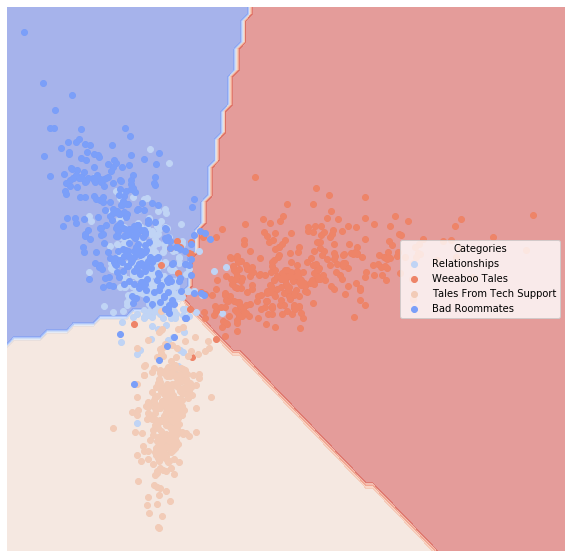

In [231]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [232]:
#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()

In [233]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [234]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.056426  0.932780   0.867470           0.812549   
Weeaboo Tales              0.059561  0.925904   0.840000           0.777944   
Tales From Tech Support    0.068966  0.898713   0.896104           0.788841   
Bad Roommates              0.072100  0.903736   0.880952           0.790068   

                           Recall  
Category                           
Relationships            0.911392  
Weeaboo Tales            0.900000  
Tales From Tech Support  0.831325  
Bad Roommates            0.850575

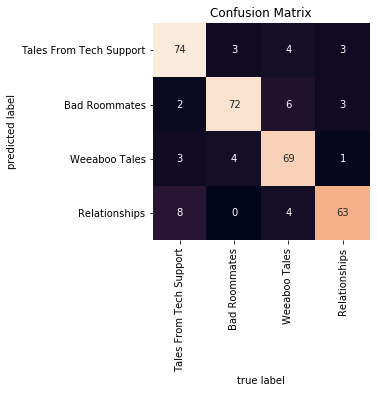

In [235]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

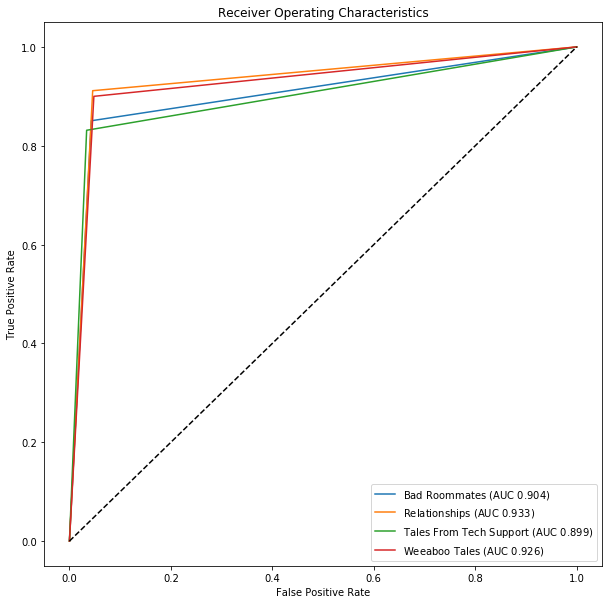

In [236]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

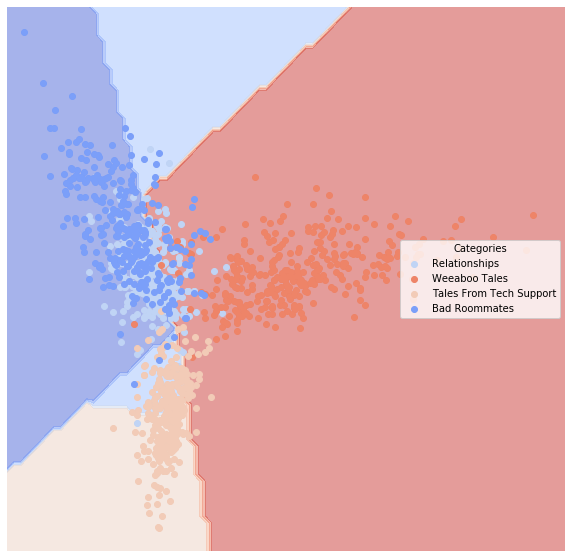

In [237]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [238]:
#Connectionists
clf = sklearn.neural_network.MLPClassifier()

In [239]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [240]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.021944  0.968434   0.961538           0.925392   
Weeaboo Tales              0.018809  0.972547   0.957143           0.925527   
Tales From Tech Support    0.003135  0.997881   0.988095           0.988095   
Bad Roommates              0.025078  0.968391   0.954023           0.922699   

                           Recall  
Category                           
Relationships            0.949367  
Weeaboo Tales            0.957143  
Tales From Tech Support  1.000000  
Bad Roommates            0.954023

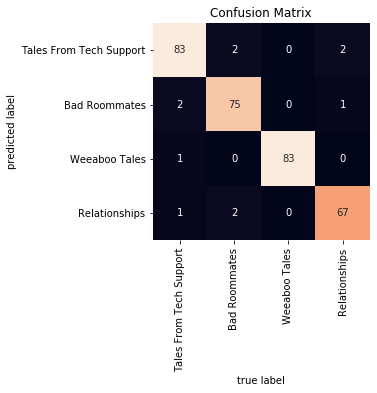

In [241]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

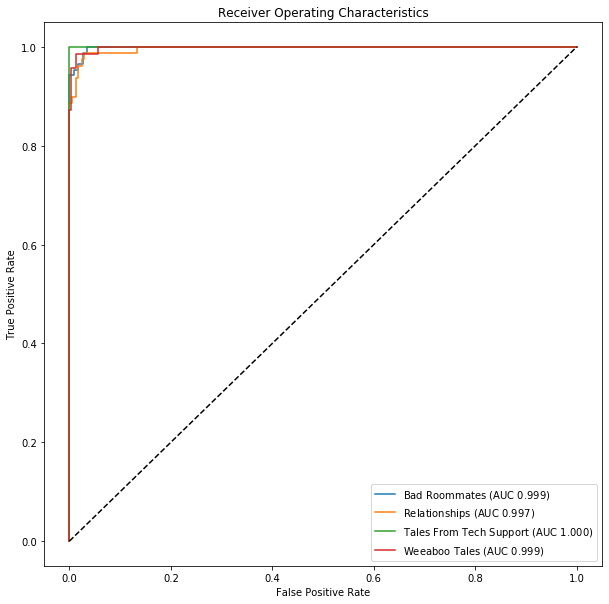

In [242]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

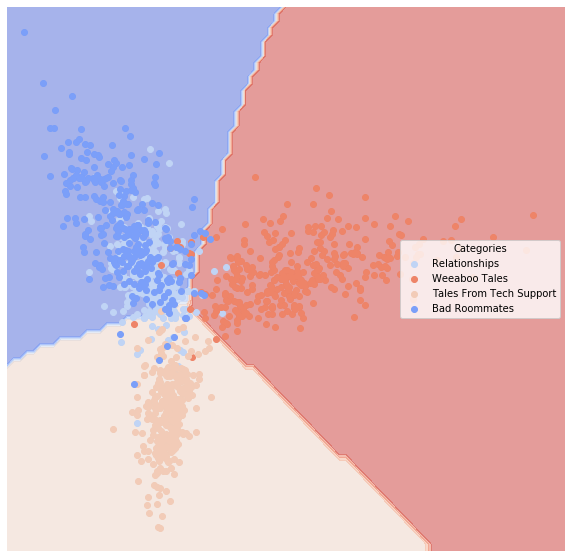

In [243]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

In [244]:
#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [245]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#slow, set probability = False to speed up

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [246]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)
#We can look at few measurements of each classifier's performance by using the testing set
#This lets us look at which classes do better:

Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.015674  0.981092   0.962500           0.944403   
Weeaboo Tales              0.021944  0.965404   0.956522           0.914403   
Tales From Tech Support    0.025078  0.979145   0.921348           0.913383   
Bad Roommates              0.025078  0.957615   0.987654           0.930131   

                           Recall  
Category                           
Relationships            0.974684  
Weeaboo Tales            0.942857  
Tales From Tech Support  0.987952  
Bad Roommates            0.919540

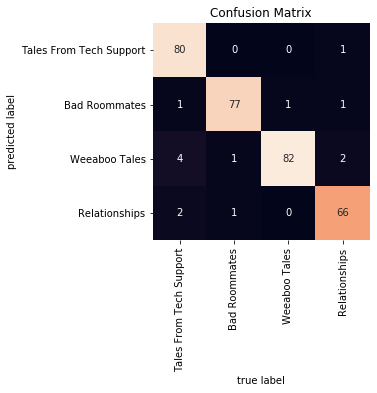

In [247]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
#This lets us look at which classes do better:

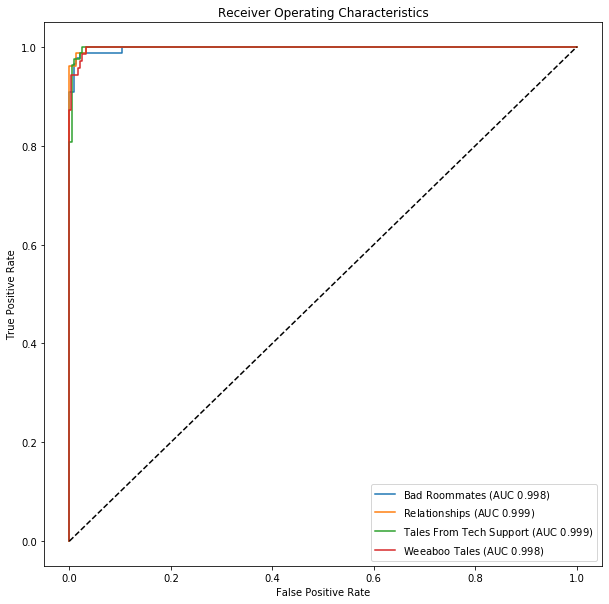

In [248]:
lucem_illud_2020.plotMultiROC(clf, dfTest)
#The greater the area under the curve the better

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

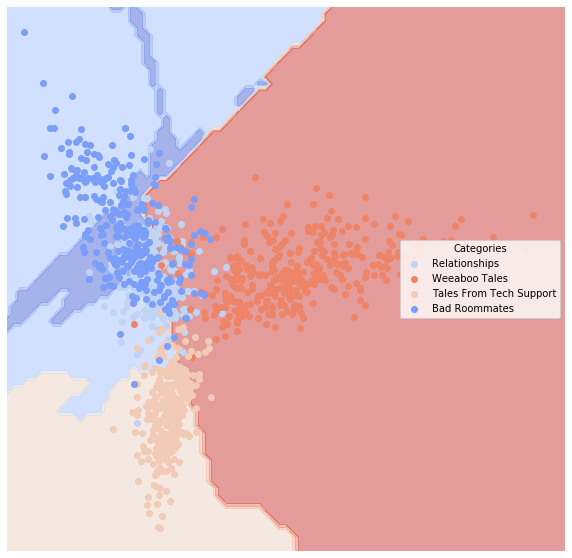

In [249]:
lucem_illud_2020.plotregions(clf, dfTrain)
#We can also look at the regions the classifer
#identifies as one class or the other:

Real Dataset #1: Analysis
Analogizes, Classical Regression, and Connectionists all produced homogeneous confusion matrices as well as colinear line plots and clear 3-region region plots.  Ensemble produced the first two of these but not the last.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [2]:
df1 = pandas.read_csv('3-09_9-40-f.csv')
#this version of the file has had all non-english language HIT rows 
#manually removed

In [3]:
import numpy 
import pandas as pd

In [4]:
df1[:49]

Requester  \
0                        Yixin Nie   
1                Sharmishtha Gupta   
2                            Panel   
3                            Panel   
4                            Panel   
5                            Panel   
6                            Panel   
7                            Panel   
8                            Panel   
9                            TeamZ   
10                    Ibotta, Inc.   
11                           TeamZ   
12                    Ibotta, Inc.   
13                    Rece Capture   
14               Shopping Receipts   
15                     Job Spotter   
16               Crowdsurf Support   
17                         Patrick   
18                  James Billings   
19                         Foxtrot   
20                             p9r   
21                 Panos Ipeirotis   
22                             p9r   
23                    rich hoffman   
24                    lovergingers   
25                    lovergingers   
26                         Dorothy   
27                             p9r   
28               Crowdsurf Support   
29                           Panel   
30                    Peggy Keller   
31                         zhou yu   
32                   CopyText Inc.   
33                   Tracy Worrell   
34               Crowdsurf Support   
35          Ignite Media Solutions   
36          Ignite Media Solutions   
37                             p9r   
38                             p9r   
39                     Bill Xouris   
40                           TeamZ   
41                     FullContact   
42  Social Perception Research Lab   
43                          PickFu   
44                    lovergingers   
45                       SocialCat   
46                             p9r   
47                         Melissa   
48                            HUGC   

                                                Title   HITs  Reward  
0                            Inference from the Text!     76  $0.12   
1   Watch TV clips and see if it's changing to/fro...      2  $0.05   
2   Extract purchased items from a shopping receip...    175  $0.01   
3     Extract purchased items from a shopping receipt  3,327  $0.08   
4   Extract purchased items from a shopping receip...     99  $0.01   
5   Extract summary information from 24 shopping r...     18  $0.05   
6     Extract purchased items from a shopping receipt     25  $0.08   
7     Extract purchased items from a shopping receipt      2  $0.09   
8   Extract purchased items from a shopping receip...      1  $0.06   
9   Restaurant Receipt/Invoice with Bonus -- ITEMI...  1,401  $0.08   
10                       Are these receipts the same?      3  $0.01   
11  Restaurant Receipt/Invoice with Bonus -- ITEMI...     14  $0.04   
12                       Are these receipts the same?      1  $0.01   
13                              Receipt Transcription    195  $0.03   
14                 Extract Data From Shopping Receipt  1,325  $0.01   
15  Collect store information of a hiring sign (WA...      1  $0.06   
16      QC Reject - Earn up to $0.20 per media minute      2  $0.20   
17  Answer a survey about your opinions, Best-in-C...      1  $0.05   
18                             Market Research Survey  9,750  $0.01   
19                             Copy Edit English Text      1  $0.05   
20                                    Transcribe data      1  $0.07   
21                                Demographics survey      1  $0.10   
22                                    Transcribe data      5  $0.01   
23  Do these profile photos contain a real human f...      2  $0.02   
24       ★★Rewrite★★Sentences★★#★#!★!10X★★bonus!★!#★#    111  $0.01   
25  ★★★★★Compare Sentences by Meaning★★★★★Increase...     67  $0.20   
26  Answer a survey about your opinions toward a n...      1  $1.00   
27                                    Transcribe data      2  $0.02   
28  Timing review - Earn up to $0.18 per timed med...      2  $0.

In [5]:
df1['tokenized_text'] = df1['Title'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df1['normalized_text'] = df1['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [6]:
#creating the new column in the dataframe that will be used for the 
#semi-manual codings of rows as HITs being used for training ML or NO 
#the random values are placeholders
sLength = len(df1['Requester'])
df1 = df1.assign(category=pd.Series(np.random.randn(sLength)).values)
df1[0:46]

Requester  \
0                        Yixin Nie   
1                Sharmishtha Gupta   
2                            Panel   
3                            Panel   
4                            Panel   
5                            Panel   
6                            Panel   
7                            Panel   
8                            Panel   
9                            TeamZ   
10                    Ibotta, Inc.   
11                           TeamZ   
12                    Ibotta, Inc.   
13                    Rece Capture   
14               Shopping Receipts   
15                     Job Spotter   
16               Crowdsurf Support   
17                         Patrick   
18                  James Billings   
19                         Foxtrot   
20                             p9r   
21                 Panos Ipeirotis   
22                             p9r   
23                    rich hoffman   
24                    lovergingers   
25                    lovergingers   
26                         Dorothy   
27                             p9r   
28               Crowdsurf Support   
29                           Panel   
30                    Peggy Keller   
31                         zhou yu   
32                   CopyText Inc.   
33                   Tracy Worrell   
34               Crowdsurf Support   
35          Ignite Media Solutions   
36          Ignite Media Solutions   
37                             p9r   
38                             p9r   
39                     Bill Xouris   
40                           TeamZ   
41                     FullContact   
42  Social Perception Research Lab   
43                          PickFu   
44                    lovergingers   
45                       SocialCat   

                                                Title   HITs  Reward  \
0                            Inference from the Text!     76  $0.12    
1   Watch TV clips and see if it's changing to/fro...      2  $0.05    
2   Extract purchased items from a shopping receip...    175  $0.01    
3     Extract purchased items from a shopping receipt  3,327  $0.08    
4   Extract purchased items from a shopping receip...     99  $0.01    
5   Extract summary information from 24 shopping r...     18  $0.05    
6     Extract purchased items from a shopping receipt     25  $0.08    
7     Extract purchased items from a shopping receipt      2  $0.09    
8   Extract purchased items from a shopping receip...      1  $0.06    
9   Restaurant Receipt/Invoice with Bonus -- ITEMI...  1,401  $0.08    
10                       Are these receipts the same?      3  $0.01    
11  Restaurant Receipt/Invoice with Bonus -- ITEMI...     14  $0.04    
12                       Are these receipts the same?      1  $0.01    
13                              Receipt Transcription    195  $0.03    
14                 Extract Data From Shopping Receipt  1,325  $0.01    
15  Collect store information of a hiring sign (WA...      1  $0.06    
16      QC Reject - Earn up to $0.20 per media minute      2  $0.20    
17  Answer a survey about your opinions, Best-in-C...      1  $0.05    
18                             Market Research Survey  9,750  $0.01    
19                             Copy Edit English Text      1  $0.05    
20                                    Transcribe data      1  $0.07    
21                                Demographics survey      1  $0.10    
22                                    Transcribe data      5  $0.01    
23  Do these profile photos contain a real human f...      2  $0.02    
24       ★★Rewrite★★Sentences★★#★#!★!10X★★bonus!★!#★#    111  $0.01    
25  ★★★★★Compare Sentences by Meaning★★★★★Increase...     67  $0.20    
26  Answer a survey about your opinions toward a n...      1  $1.00    
27                                    Transcribe data      2  $0.02    
28  Timing review - Earn up to $0.18 per timed med...      2  $0.18    
29  Extract purchased items from a shopping receip...      2  $0.04    
30    

In [7]:
#if the Title contains any of these words known 
#to be associated with HITs for training ML, 
#then the row is coded as "ML", if not it is coded as "NO"
                 
MLkeywords = ["bot","chat","chatbot","AI","ML", "machine","annotate","categorize",
              "classify","boundary","bounding","label","trace", "speech"
             "identify","image","train","robot", "tag", "extract", "transcribe",
             "draw", "sort", "predict", "category", "picture", "voice",
             "computer", "correct", "photo", "photograph", "speak"]


In [8]:
#this creates a dataframe containing only ML-coded rows
mask = df1.normalized_text.apply(lambda x: any(item for item 
                                               in MLkeywords 
                                               if item in x))
MLdf = df1[mask]

MLdf["category"] = "ML"
MLdf

C:\Users\acmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Requester  \
2                     Panel   
3                     Panel   
4                     Panel   
5                     Panel   
6                     Panel   
7                     Panel   
8                     Panel   
14        Shopping Receipts   
20                      p9r   
22                      p9r   
23             rich hoffman   
27                      p9r   
29                    Panel   
31                  zhou yu   
32            CopyText Inc.   
35   Ignite Media Solutions   
36   Ignite Media Solutions   
37                      p9r   
38                      p9r   
39              Bill Xouris   
45                SocialCat   
46                      p9r   
50        Shinichi Yamasaki   
53           Justin Thacker   
65                Jiayu Yao   
68              Scotty Alto   
73                Wang Liao   
75                Wang Liao   
86      BoxWave Corporation   
95              Scotty Alto   
..                      ...   
602                 UserBob   
609       Dialogue Research   
610       Dialogue Research   
611       Dialogue Research   
612       Dialogue Research   
613       Dialogue Research   
614       Dialogue Research   
615       Dialogue Research   
616       Dialogue Research   
617       Dialogue Research   
618       Dialogue Research   
619       Dialogue Research   
620       Dialogue Research   
621       Dialogue Research   
622       Dialogue Research   
623       Dialogue Research   
626                 zhou yu   
627                   SLS-6   
628                   SLS-6   
629          VisionLearning   
630                 zhou yu   
631                 zhou yu   
633       Dialogue Research   
636       Dialogue Research   
637       Dialogue Research   
638       Dialogue Research   
639       Dialogue Research   
644       Dialogue Research   
668            Jasmine Wang   
669            Jasmine Wang   

                                                 Title   HITs  Reward  \
2    Extract purchased items from a shopping receip...    175  $0.01    
3      Extract purchased items from a shopping receipt  3,327  $0.08    
4    Extract purchased items from a shopping receip...     99  $0.01    
5    Extract summary information from 24 shopping r...     18  $0.05    
6      Extract purchased items from a shopping receipt     25  $0.08    
7      Extract purchased items from a shopping receipt      2  $0.09    
8    Extract purchased items from a shopping receip...      1  $0.06    
14                  Extract Data From Shopping Receipt  1,325  $0.01    
20                                     Transcribe data      1  $0.07    
22                                     Transcribe data      5  $0.01    
23   Do these profile photos contain a real human f...      2  $0.02    
27                                     Transcribe data      2  $0.02    
29   Extract purchased items from a shopping receip...      2  $0.04    
31   Chat for movie trailer recommendation! - Bonus...    192  $0.25    
32   Type the text from the images, carefully. Prod...     45  $0.01    
35   Transcribe name and address from two audio rec...      1  $0.06    
36   Transcribe address from audio recording and pa...      1  $0.05    
37                                     Transcribe data      1  $0.04    
38                                     Transcribe data     13  $0.03    
39     Label how relevant News Titles are to a company    603  $0.02    
45                      Categorize a Social Media Post      1  $0.08    
46                                     Transcribe data     25  $0.03    
50                   Trace all the cracks in the image  5,143  $0.04    
53                               Appliance Image Entry      2  $0.05    
65         Sentence Labeling - Amazon comment (~3 min)    450  $0.30    
68          Extract summary information from 1 invoice      3  $0.05    
73         Categorize social science research articles     50  $0.25    
75   Qualification for "Categorize social science r

In [9]:
#this creates a dataframe containg only OTHER-coded rows
mask = ~df1.normalized_text.apply(lambda x: any(item for item 
                                               in MLkeywords 
                                               if item in x))
OTHERdf = df1[mask]

OTHERdf["category"] = "OTHER"
OTHERdf[29:]

C:\Users\acmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Requester  \
52                            Publishing   
54                             Sewon Min   
55                               Joe Hsu   
56                                PickFu   
57                                   CEL   
58                                   CEL   
59                           str11223344   
60                      MDC & Associates   
61                           str11223344   
62                           str11223344   
63                   Thenuka Karunaratne   
64                          William Wood   
66                           duan-tajima   
67                         Laszlo Sajtos   
69                                 Khanh   
70                                 henry   
71                                 TeamZ   
72                          Bright--Side   
74                               BIU NLP   
76                               UserBob   
77   SoundingBox (Change Sciences Group)   
78                                  HUGC   
79                            Faizan Ali   
80                           IC3 AI team   
81                               stephen   
82                               Jungmin   
83                       Sauder Research   
84                                 TeamZ   
85                                  Xzzx   
87                               Positly   
..                                   ...   
642                            FAI study   
643                             michelle   
645                        Olivier Klein   
646                        Olivier Klein   
647                        Olivier Klein   
648                        Olivier Klein   
649                             PPC WWBP   
650                        Olivier Klein   
651                        Olivier Klein   
652                        Olivier Klein   
653                        Olivier Klein   
654                                 LSAN   
655                            Noah Turk   
656                            Noah Turk   
657                        Olivier Klein   
658                          Paul Conway   
659                        Olivier Klein   
660                            Noah Turk   
661                    Dialogue Research   
662                            Noah Turk   
663              Chatbot for Car Dealers   
664              Chatbot for Car Dealers   
665              Chatbot for Car Dealers   
666                          Paul Conway   
667                            L. Martin   
670                        Joanna Herres   
671                        Darren Thorpe   
672                            Pinterest   
673                            Pinterest   
674                                 LSAN   

                                                 Title   HITs  Reward  \
52                 Collect data from a Craigslist Post    239  $0.01    
54   Finalizing possible intended question-answer p...      5  $0.05    
55    Compensation HIT for A36O6HV8LCXLJR(~ 1 minutes)      1  $0.42    
56                 Take a 1-question survey (US-based)      1  $0.05    
57   Survey for fathers of 3 and 4 year old childre...      6  $2.00    
58   Survey for mothers of 3 and 4 year old childre...      2  $2.00    
59   Tell us what this item is - Soft Goods - Batch...     20  $0.08    
60   Play a Virus Slayer video game and earn $15!(~...      1  $1.00    
61   Tell us what this item is - Soft Goods - Batch...      3  $0.08    
62   Tell us what this item is - General Contents -...     37  $0.08    
63                                Netflix shows survey      1  $1.00    
64              Quick Survey for Small Business Owners      1  $0.25    
66                         Canis Animal Categorization      1  $0.20    
67                 Answer a survey about your opinions      1  $1.00    
69            Answer a survey about a service scenario      1  $0.03    
70   Quickly lookup specific information for an org...  3,638  $0.75    
71                 Restaurant Statement -- ITEMIZATION     43

In [18]:
#merging the two masked dataframes
masks = (MLdf, OTHERdf)
df2 = pd.concat(masks, ignore_index=True)
df2

Requester  \
0                      Panel   
1                      Panel   
2                      Panel   
3                      Panel   
4                      Panel   
5                      Panel   
6                      Panel   
7          Shopping Receipts   
8                        p9r   
9                        p9r   
10              rich hoffman   
11                       p9r   
12                     Panel   
13                   zhou yu   
14             CopyText Inc.   
15    Ignite Media Solutions   
16    Ignite Media Solutions   
17                       p9r   
18                       p9r   
19               Bill Xouris   
20                 SocialCat   
21                       p9r   
22         Shinichi Yamasaki   
23            Justin Thacker   
24                 Jiayu Yao   
25               Scotty Alto   
26                 Wang Liao   
27                 Wang Liao   
28       BoxWave Corporation   
29               Scotty Alto   
..                       ...   
645                FAI study   
646                 michelle   
647            Olivier Klein   
648            Olivier Klein   
649            Olivier Klein   
650            Olivier Klein   
651                 PPC WWBP   
652            Olivier Klein   
653            Olivier Klein   
654            Olivier Klein   
655            Olivier Klein   
656                     LSAN   
657                Noah Turk   
658                Noah Turk   
659            Olivier Klein   
660              Paul Conway   
661            Olivier Klein   
662                Noah Turk   
663        Dialogue Research   
664                Noah Turk   
665  Chatbot for Car Dealers   
666  Chatbot for Car Dealers   
667  Chatbot for Car Dealers   
668              Paul Conway   
669                L. Martin   
670            Joanna Herres   
671            Darren Thorpe   
672                Pinterest   
673                Pinterest   
674                     LSAN   

                                                 Title   HITs  Reward  \
0    Extract purchased items from a shopping receip...    175  $0.01    
1      Extract purchased items from a shopping receipt  3,327  $0.08    
2    Extract purchased items from a shopping receip...     99  $0.01    
3    Extract summary information from 24 shopping r...     18  $0.05    
4      Extract purchased items from a shopping receipt     25  $0.08    
5      Extract purchased items from a shopping receipt      2  $0.09    
6    Extract purchased items from a shopping receip...      1  $0.06    
7                   Extract Data From Shopping Receipt  1,325  $0.01    
8                                      Transcribe data      1  $0.07    
9                                      Transcribe data      5  $0.01    
10   Do these profile photos contain a real human f...      2  $0.02    
11                                     Transcribe data      2  $0.02    
12   Extract purchased items from a shopping receip...      2  $0.04    
13   Chat for movie trailer recommendation! - Bonus...    192  $0.25    
14   Type the text from the images, carefully. Prod...     45  $0.01    
15   Transcribe name and address from two audio rec...      1  $0.06    
16   Transcribe address from audio recording and pa...      1  $0.05    
17                                     Transcribe data      1  $0.04    
18                                     Transcribe data     13  $0.03    
19     Label how relevant News Titles are to a company    603  $0.02    
20                      Categorize a Social Media Post      1  $0.08    
21                                     Transcribe data     25  $0.03    
22                   Trace all the cracks in the image  5,143  $0.04    
23                               Appliance Image Entry      2  $0.05    
24         Sentence Labeling - Amazon comment (~3 min)    450  $0.30    
25          Extract summary information from 1 invoice      3  $0.05    
26         Categorize social science research articles     50  

In [20]:
df2

Requester  \
0                      Panel   
1                      Panel   
2                      Panel   
3                      Panel   
4                      Panel   
5                      Panel   
6                      Panel   
7          Shopping Receipts   
8                        p9r   
9                        p9r   
10              rich hoffman   
11                       p9r   
12                     Panel   
13                   zhou yu   
14             CopyText Inc.   
15    Ignite Media Solutions   
16    Ignite Media Solutions   
17                       p9r   
18                       p9r   
19               Bill Xouris   
20                 SocialCat   
21                       p9r   
22         Shinichi Yamasaki   
23            Justin Thacker   
24                 Jiayu Yao   
25               Scotty Alto   
26                 Wang Liao   
27                 Wang Liao   
28       BoxWave Corporation   
29               Scotty Alto   
..                       ...   
645                FAI study   
646                 michelle   
647            Olivier Klein   
648            Olivier Klein   
649            Olivier Klein   
650            Olivier Klein   
651                 PPC WWBP   
652            Olivier Klein   
653            Olivier Klein   
654            Olivier Klein   
655            Olivier Klein   
656                     LSAN   
657                Noah Turk   
658                Noah Turk   
659            Olivier Klein   
660              Paul Conway   
661            Olivier Klein   
662                Noah Turk   
663        Dialogue Research   
664                Noah Turk   
665  Chatbot for Car Dealers   
666  Chatbot for Car Dealers   
667  Chatbot for Car Dealers   
668              Paul Conway   
669                L. Martin   
670            Joanna Herres   
671            Darren Thorpe   
672                Pinterest   
673                Pinterest   
674                     LSAN   

                                                 Title   HITs  Reward  \
0    Extract purchased items from a shopping receip...    175  $0.01    
1      Extract purchased items from a shopping receipt  3,327  $0.08    
2    Extract purchased items from a shopping receip...     99  $0.01    
3    Extract summary information from 24 shopping r...     18  $0.05    
4      Extract purchased items from a shopping receipt     25  $0.08    
5      Extract purchased items from a shopping receipt      2  $0.09    
6    Extract purchased items from a shopping receip...      1  $0.06    
7                   Extract Data From Shopping Receipt  1,325  $0.01    
8                                      Transcribe data      1  $0.07    
9                                      Transcribe data      5  $0.01    
10   Do these profile photos contain a real human f...      2  $0.02    
11                                     Transcribe data      2  $0.02    
12   Extract purchased items from a shopping receip...      2  $0.04    
13   Chat for movie trailer recommendation! - Bonus...    192  $0.25    
14   Type the text from the images, carefully. Prod...     45  $0.01    
15   Transcribe name and address from two audio rec...      1  $0.06    
16   Transcribe address from audio recording and pa...      1  $0.05    
17                                     Transcribe data      1  $0.04    
18                                     Transcribe data     13  $0.03    
19     Label how relevant News Titles are to a company    603  $0.02    
20                      Categorize a Social Media Post      1  $0.08    
21                                     Transcribe data     25  $0.03    
22                   Trace all the cracks in the image  5,143  $0.04    
23                               Appliance Image Entry      2  $0.05    
24         Sentence Labeling - Amazon comment (~3 min)    450  $0.30    
25          Extract summary information from 1 invoice      3  $0.05    
26         Categorize social science research articles     50  

In [21]:
df2.to_csv("df2.csv", encoding='utf-8', index=False)

In [22]:
df2['category'] = [s == 'ML' for s in df2['category']]

In [23]:
df2= df2[~df2.index.duplicated()]
#to remove duplicate Titles so that the below code will work 

In [24]:
df2

Requester  \
0                      Panel   
1                      Panel   
2                      Panel   
3                      Panel   
4                      Panel   
5                      Panel   
6                      Panel   
7          Shopping Receipts   
8                        p9r   
9                        p9r   
10              rich hoffman   
11                       p9r   
12                     Panel   
13                   zhou yu   
14             CopyText Inc.   
15    Ignite Media Solutions   
16    Ignite Media Solutions   
17                       p9r   
18                       p9r   
19               Bill Xouris   
20                 SocialCat   
21                       p9r   
22         Shinichi Yamasaki   
23            Justin Thacker   
24                 Jiayu Yao   
25               Scotty Alto   
26                 Wang Liao   
27                 Wang Liao   
28       BoxWave Corporation   
29               Scotty Alto   
..                       ...   
645                FAI study   
646                 michelle   
647            Olivier Klein   
648            Olivier Klein   
649            Olivier Klein   
650            Olivier Klein   
651                 PPC WWBP   
652            Olivier Klein   
653            Olivier Klein   
654            Olivier Klein   
655            Olivier Klein   
656                     LSAN   
657                Noah Turk   
658                Noah Turk   
659            Olivier Klein   
660              Paul Conway   
661            Olivier Klein   
662                Noah Turk   
663        Dialogue Research   
664                Noah Turk   
665  Chatbot for Car Dealers   
666  Chatbot for Car Dealers   
667  Chatbot for Car Dealers   
668              Paul Conway   
669                L. Martin   
670            Joanna Herres   
671            Darren Thorpe   
672                Pinterest   
673                Pinterest   
674                     LSAN   

                                                 Title   HITs  Reward  \
0    Extract purchased items from a shopping receip...    175  $0.01    
1      Extract purchased items from a shopping receipt  3,327  $0.08    
2    Extract purchased items from a shopping receip...     99  $0.01    
3    Extract summary information from 24 shopping r...     18  $0.05    
4      Extract purchased items from a shopping receipt     25  $0.08    
5      Extract purchased items from a shopping receipt      2  $0.09    
6    Extract purchased items from a shopping receip...      1  $0.06    
7                   Extract Data From Shopping Receipt  1,325  $0.01    
8                                      Transcribe data      1  $0.07    
9                                      Transcribe data      5  $0.01    
10   Do these profile photos contain a real human f...      2  $0.02    
11                                     Transcribe data      2  $0.02    
12   Extract purchased items from a shopping receip...      2  $0.04    
13   Chat for movie trailer recommendation! - Bonus...    192  $0.25    
14   Type the text from the images, carefully. Prod...     45  $0.01    
15   Transcribe name and address from two audio rec...      1  $0.06    
16   Transcribe address from audio recording and pa...      1  $0.05    
17                                     Transcribe data      1  $0.04    
18                                     Transcribe data     13  $0.03    
19     Label how relevant News Titles are to a company    603  $0.02    
20                      Categorize a Social Media Post      1  $0.08    
21                                     Transcribe data     25  $0.03    
22                   Trace all the cracks in the image  5,143  $0.04    
23                               Appliance Image Entry      2  $0.05    
24         Sentence Labeling - Amazon comment (~3 min)    450  $0.30    
25          Extract summary information from 1 invoice      3  $0.05    
26         Categorize social science research articles     50  

In [26]:
df2.to_csv("df2a.csv", encoding='utf-8', index=False)

In [27]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(df2, holdBackFraction=holdBackFraction)

In [28]:
print(len(train_data_df))
print(len(test_data_df))

540
135


Logistic Regression

In [29]:
import sklearn.feature_extraction
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['Title'])

In [30]:
TFVects.shape
#produces a matrix of word counts

(540, 375)

In [31]:
#saving this to the dataframe
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. 

Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use stack not sum for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [32]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [33]:
#storing PCA space vectors in the dataframe also 
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


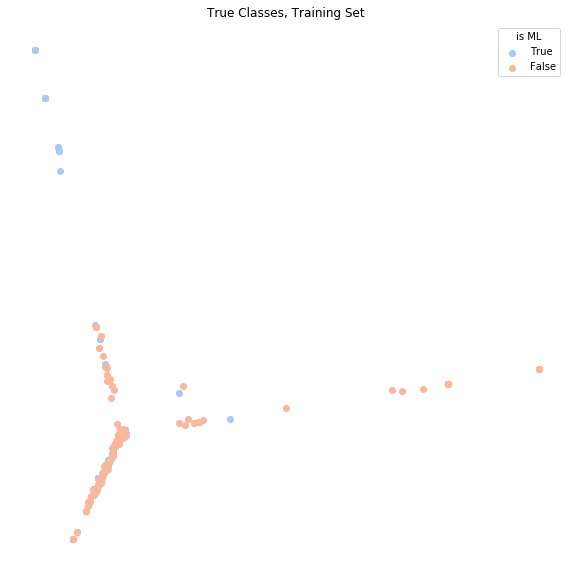

In [34]:
#visualizing in 2D
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot ML
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not ML
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'is ML')
plt.title('True Classes, Training Set')
plt.show()

The model using PCA as visualized above is not very accurate.

A screeplot is performed below to discern how many Principle Components are needed for an accurate model.

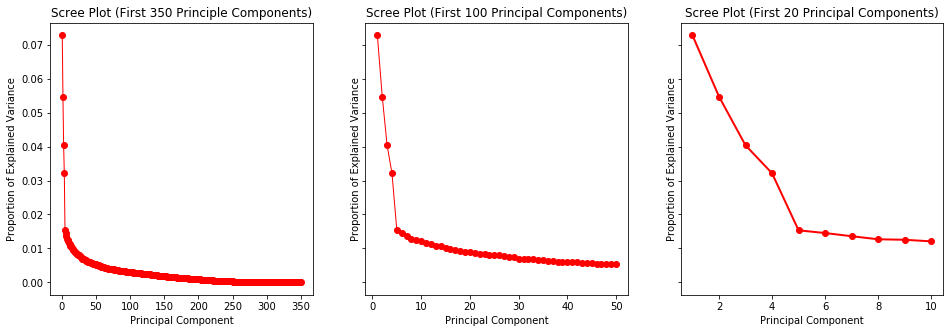

In [35]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(350) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_[:350], 'ro-', linewidth=1)
ax1.set_title('Scree Plot (First 350 Principle Components)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 100 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(10) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:10], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')



plt.show()

From these plots, the first 20 PCs seem promising.

In [36]:
train_data_df['pca_reduced_20'] = train_data_df['pca'].apply(lambda x: x[:20])

In [37]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
logistic.score(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['category'])

0.8777777777777778

Testing this model on the "testing dataset" that was held out previously.

In [39]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['Title'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_20'] = test_data_df['pca'].apply(lambda x: x[:20])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_20'], axis=0), test_data_df['category'])

0.8740740740740741

The performance is very slightly worse but not by a significant amount.

Before settling on 20 dimensions, testing it once more with 30.

train_data_df['pca_reduced_30'] = train_data_df['pca'].apply(lambda x: x[:30])
test_data_df['pca_reduced_30'] = test_data_df['pca'].apply(lambda x: x[:30])

logistic.fit(np.stack(train_data_df['pca_reduced_30'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_30'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_30'], axis=0), test_data_df['category']))

A slight improvement, enough to consider.

Now, the below code attempts a logistic regression using the TF-IDF scores for each word with an L1 regularization/L1-norm loss fuction aka LAD least absolute deviations.  From Notebook 3:

It minimizes the sum of the absolute differences (S) between the target value ( 𝑌𝑖 ) and the estimated values ( 𝑓(𝑥𝑖) ) and prunes all insignificant variables (i.e., word TF-IDF scores):

𝑆=∑𝑛𝑖=1|𝑦𝑖=𝑓(𝑥𝑖)| 

The result is a model retaining only the most individually significant features.


nsamples, nx, ny = train_data_df.shape
d2_train_data_df = train_data_df.reshape((nsamples,nx*ny))

In [40]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.912962962962963


In [41]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.9111111111111111


~89% is likely the best possible from logistic regression then.

In [42]:
#trying again but with naive bayes
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [43]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9574074074074074
Testing:
0.9111111111111111


The accuracy is only slighly improved over the Logistic Regression

In [44]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [45]:
#Precision
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8235294117647058

In [46]:
#Recall
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.6086956521739131

In [47]:
#F1-measure
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.7

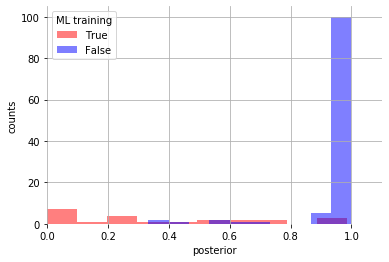

In [48]:
#posterior distribution compared to the truth
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "ML training")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

This plot seems to show a certain degree of accuracy.

In [49]:
#examining which words are most influential
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'ML' : [],
    'ML_log_prob' : [],
    'OTHER' : [],
    'OTHER_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['ML'].append(TFVectorizer.get_feature_names()[i])
    words_dict['ML_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['OTHER'].append(TFVectorizer.get_feature_names()[i])
    words_dict['OTHER_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

ML  ML_log_prob       OTHER  OTHER_log_prob
0         survey    -1.493266     extract       -1.256617
1            hit    -2.000514    shopping       -1.284016
2   compensation    -2.442347     receipt       -1.312186
3         answer    -2.470518        data       -1.371027
4             10    -2.847812       items       -1.535330
5          study    -2.934824        chat       -1.648659
6          short    -3.081427         bot       -1.732040
7           text    -3.135494     general       -1.776492
8         social    -3.192653    evaluate       -1.823012
9    information    -3.253277   generated       -2.564949
10        minute    -3.253277      images       -2.670310
11            15    -3.386809       bonus       -2.788093
12          data    -3.386809   questions       -2.788093
13       collect    -3.460917  transcribe       -2.788093
14       website    -3.460917       image       -2.921624

### <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

Decision Trees
for classifications (categorial labels) and regressions (continuous lables)

In [50]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


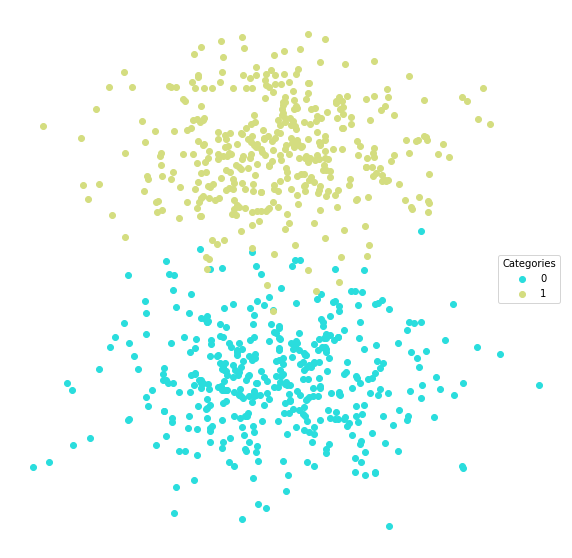

In [51]:
#Decision Tree classifier
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

In [52]:
#importing decision tree classifier from sklearn.tree and fitting it 
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


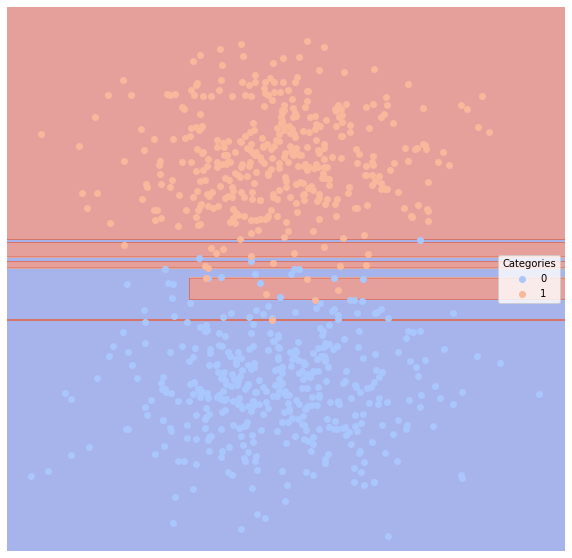

In [53]:
#visualized Classification
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [54]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.045  0.953502   0.966292           0.933273  0.934783
1              0.045  0.953502   0.945946           0.934670  0.972222

In [55]:
#accuracy of Classification
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.955

F1-measure:

In [56]:
sklearn.metrics.f1_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.9589041095890412

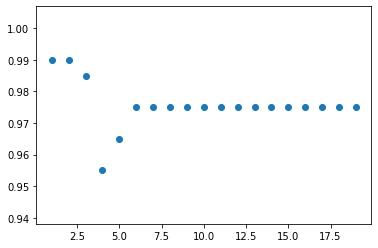

In [57]:
#"trimming" the tree
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

visualization suggets that the model is overfitting beyond the first 8 layers

from Notebook 3:

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called bagging and is a type of ensemble method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A random forest is produced by bagging decision trees.

In [58]:
#random forest ensemble
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [59]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


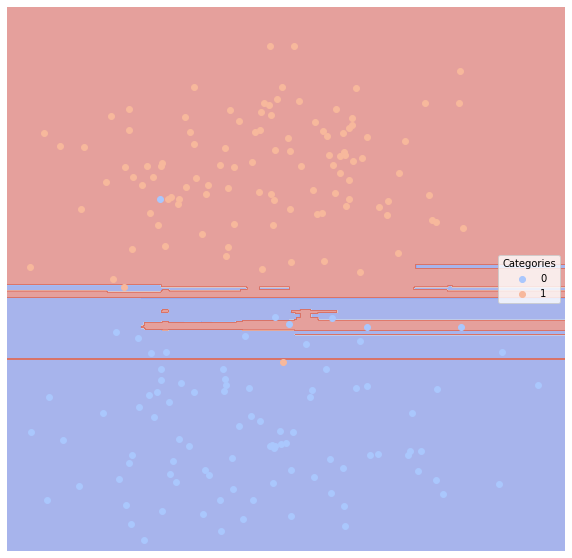

In [60]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [61]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.03  0.969002   0.977778           0.955266  0.956522
1               0.03  0.969002   0.963636           0.955791  0.981481

In [62]:
#accuracy of Classification
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.955

F1-measure:

In [63]:
sklearn.metrics.f1_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.9589041095890412

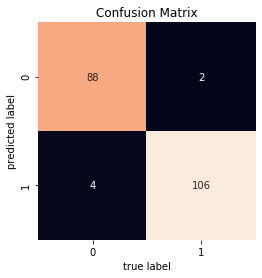

In [64]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

In this instance, the decision tree method slightly outperformed the bagged ensemble in every metric.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [67]:
df2 = pd.read_csv("df2.csv")

In [85]:
df2 

Title  \
Requester                                                                    
Panel                    Extract purchased items from a shopping receip...   
Panel                      Extract purchased items from a shopping receipt   
Panel                    Extract purchased items from a shopping receip...   
Panel                    Extract summary information from 24 shopping r...   
Panel                      Extract purchased items from a shopping receipt   
Panel                      Extract purchased items from a shopping receipt   
Panel                    Extract purchased items from a shopping receip...   
Shopping Receipts                       Extract Data From Shopping Receipt   
p9r                                                        Transcribe data   
p9r                                                        Transcribe data   
rich hoffman             Do these profile photos contain a real human f...   
p9r                                                        Transcribe data   
Panel                    Extract purchased items from a shopping receip...   
zhou yu                  Chat for movie trailer recommendation! - Bonus...   
CopyText Inc.            Type the text from the images, carefully. Prod...   
Ignite Media Solutions   Transcribe name and address from two audio rec...   
Ignite Media Solutions   Transcribe address from audio recording and pa...   
p9r                                                        Transcribe data   
p9r                                                        Transcribe data   
Bill Xouris                Label how relevant News Titles are to a company   
SocialCat                                   Categorize a Social Media Post   
p9r                                                        Transcribe data   
Shinichi Yamasaki                        Trace all the cracks in the image   
Justin Thacker                                       Appliance Image Entry   
Jiayu Yao                      Sentence Labeling - Amazon comment (~3 min)   
Scotty Alto                     Extract summary information from 1 invoice   
Wang Liao                      Categorize social science research articles   
Wang Liao                Qualification for "Categorize social science r...   
BoxWave Corporation      Find High Resolution Image of Device with a Wh...   
Scotty Alto                     Extract summary information from 1 invoice   
...                                                                    ...   
FAI study                                           HIT for A3SGR153YCJ1XN   
michelle                                        Quick Ben & Jerry's Survey   
Olivier Klein                                       HIT for A2AH0FADJ9PCE5   
Olivier Klein                                       HIT for A2FYQIZWV2UJHS   
Olivier Klein                                       HIT for A33KIELSFIQ02Q   
Olivier Klein                                       HIT for A3HW4QDJB63OQ2   
PPC WWBP                                          Empathic Conversation 99   
Olivier Klein                                       HIT for A1RTLF0OVZI4QT   
Olivier Klein                                       HIT for A14FPZMC9ENX8E   
Olivier Klein                                       HIT for A1U5BE8XJRXKW3   
Olivier Klein                                       HIT for A1U3UUELW55W65   
LSAN                             Answer a survey about faces and emotions.   
Noah Turk                          Which Conversational Partner is Better?   
Noah Turk                          Which Conversational Partner is Better?   
Olivier Klein                                       HIT for A191V7PT3DQKDP   
Paul Conway                                   Compensation: Moral Thinking   
Olivier Klein                                       HIT for A270HX8LH9LJ8W   
Noah Turk                          Which Conversational Partner is Better?   
Dialogue Research                                                Multi-WOZ   
Noah Turk    

In [87]:
#training and testing sets
holdBackFraction = .2
train_df2, test_df2 = lucem_illud_2020.trainTestSplit(df2, holdBackFraction=holdBackFraction)

In [88]:
#initializing k-nearest neighbors classifier
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [89]:
#classying with TF-IDF vectors
TFVectorizer_df2 = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_df2 = TFVectorizer_df2.fit_transform(train_df2['Title'])
train_df2['vect'] = [np.array(v).flatten() for v in TFVects_df2.todense()]

In [90]:
clf_knearest.fit(np.stack(train_df2['vect'], axis = 0), train_df2['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [91]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_df2)

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
OTHER       0.140299  0.5   0.859701           0.859701     1.0
ML          0.140299  0.5   0.000000           0.140299     0.0

In [78]:
#testing data

#Create vectors
TFVects_test = TFVectorizer_df2.transform(test_df2['Title'])
test_df2['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_df2['nb_predict'] = clf_knearest.predict(np.stack(test_df2['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_df2['vect'], axis=0), test_df2['category']))

Testing score:
0.8666666666666667


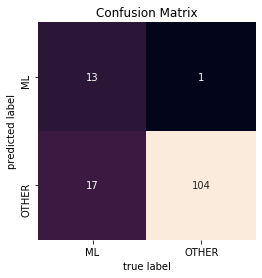

In [79]:
#confusiuon matrix
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_df2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


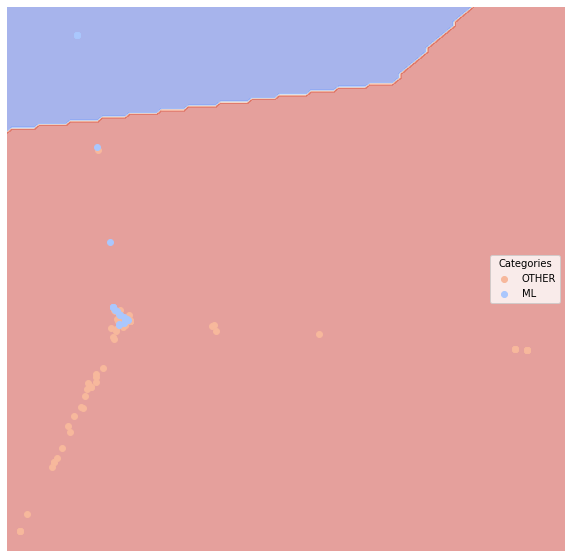

In [80]:
#PCA space visual
lucem_illud_2020.plotregions(clf_knearest, test_df2)

k-means clustering uses unsupervised learning to produce clusters of unlabeled data, while K-nearest neighbor method uses supervised learning to assign classifications from existing labels.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

SVMs: Support Vector Machines
creating the partition that preserves the "maximum margin" bewteen classes

In [82]:
df2 = pandas.read_csv('df2.csv', index_col = 0)


#tokenize and normalize
df2['tokenized_text'] = df2['Title'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df2['normalized_text'] = df2['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [92]:
df2= df2[~df2.index.duplicated()]
#to remove duplicate Titles so that the below code will work 

In [93]:
#using TF-IDF to vectorize the data

df2TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
df2TFVects = df2TFVectorizer.fit_transform([' '.join(l) for l in df2['normalized_text']])
df2['vect'] = [np.array(v).flatten() for v in df2TFVects.todense()]

In [94]:
#initializing the model, splitting into test and train dataframes
holdBackFraction = .2
train_df2, test_df2 = lucem_illud_2020.trainTestSplit(df2, holdBackFraction=holdBackFraction)

In [95]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_df2['vect'], axis=0), train_df2['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_df2)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
OTHER       0.084337  0.766667   0.906667           0.906667  1.000000
ML          0.084337  0.766667   1.000000           0.617671  0.533333

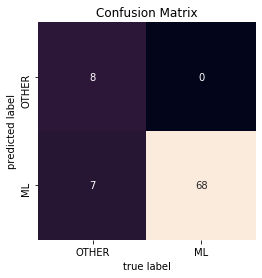

In [97]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_df2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


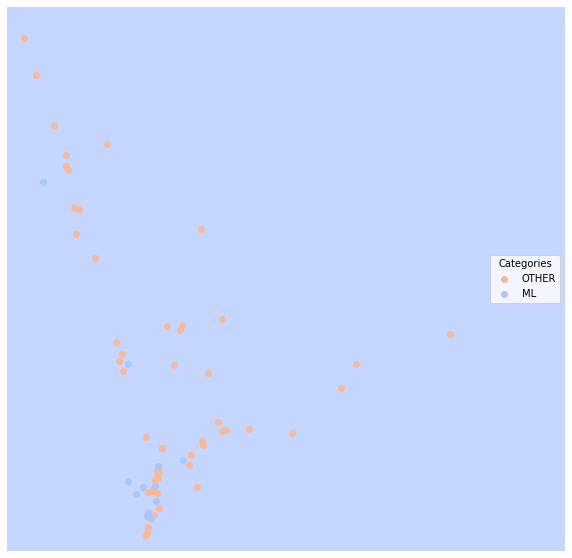

In [98]:
lucem_illud_2020.plotregions(clf_svm, test_df2)

# Neural Nets

From Notebook3:

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [99]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df2['vect'], axis=0), train_df2['category'])

C:\Users\acmel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [100]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_df2)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
OTHER       0.120482  0.770588   0.914286           0.908697  0.941176
ML          0.120482  0.770588   0.692308           0.487674  0.600000

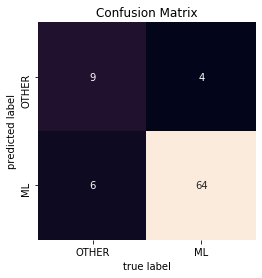

In [101]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_df2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


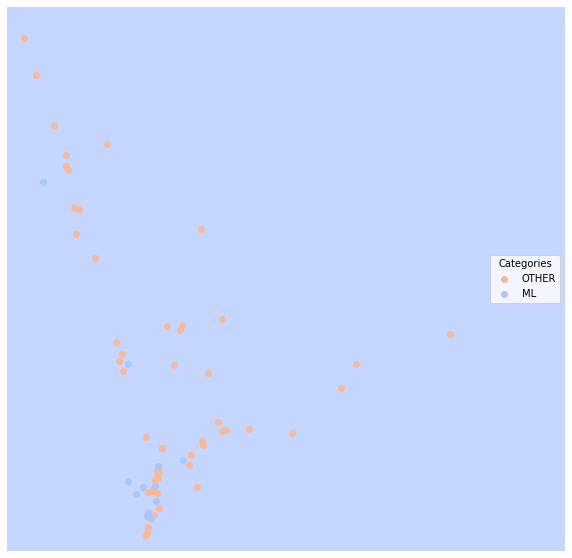

In [102]:
lucem_illud_2020.plotregions(clf_nn, test_df2)

neural net approaches like MLP is different from other forms of both classification and regression in that it involves one or more layers of hidden processing between the input and output, wherein the values assigned to data in the input layer are wieghed in a certain way that is recieved by the output layer before being converted back into values. 